<h1 style='color: green; font-size: 36px; font-weight: bold;'>Regressão Linear Múltipla - Apartamentos Rio Grande</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O  dataset é uma amostra de tamanho 477 de imóveis disponíveis para venda no município de Rio Grande - RS.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Tipo</b> - Se é casa ou apartamento, apartamento duplex, cobertura, rancho, sobrado </li>
    <li><b>Bairro</b> - Qual bairro pertence </li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Quartos</b> - Quantidade de quartos</li>
    <li><b>Vaga</b> - Quantidade de Vagas</li>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Piscina</b> - se <b>0</b> não possui, se <b>1</b> possui</li>
</ul>


## Leitura dos dados

In [2]:
dados = pd.read_csv('imobiliaria_lindalvo_dados_unidos_321_e_g3.csv', sep=',')

## Visualizar os dados

In [3]:
dados.head()

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor,Piscina
0,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,4,1,2,6,250.0,850000.0,1
1,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,3,3,2,4,380.0,1200000.0,1
2,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,1,1,2,140.0,1060000.0,1
3,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Miguel de Castro Moreira,3,2,3,2,172.0,320000.0,0
4,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,2,1,1,1,68.0,450000.0,0


## Verificando o tamanho do dataset

In [4]:
dados.shape

(477, 11)

In [5]:
dados.columns

Index(['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area_construida', 'Valor', 'Piscina'],
      dtype='object')

## Convertendo  Object para número

In [6]:
dados['Area_construida'].unique()

array([250.  , 380.  , 140.  , 172.  ,  68.  , 110.  , 125.  ,  90.  ,
        92.  , 230.  , 120.  , 220.  ,  76.  , 101.  , 200.  , 171.  ,
       130.  ,   1.  , 400.  , 180.  , 198.  , 315.  , 280.  , 282.  ,
       240.  , 100.  , 350.  , 377.  , 270.  , 190.  ,  98.  , 160.  ,
        85.  , 485.  ,  74.  , 164.  , 114.  ,  64.  , 150.  ,  84.  ,
       292.  , 305.  , 175.  , 202.  , 162.  , 235.  ,  65.  , 170.  ,
       420.  ,  80.  , 223.  ,   0.  ,   2.  , 185.  ,  55.  , 300.  ,
        75.  , 126.  ,  57.  , 260.  ,  94.  ,  60.  ,  50.  ,  59.  ,
       569.  ,  51.  , 178.  ,  87.  , 335.  , 107.  ,  70.  ,  52.  ,
        47.  , 104.  ,  77.  ,  48.  ,  45.  ,  96.  , 473.  ,  72.  ,
       122.  , 201.  ,  62.  ,  69.  , 500.  , 145.  ,  54.  ,  20.  ,
       134.  , 259.  ,  36.  ,  56.  , 169.  ,  43.  ,  42.  , 102.  ,
        53.  ,  46.  ,  71.  ,  38.  , 225.  ,  40.  , 112.  ,  58.  ,
       330.  , 480.  ,  82.  , 146.  , 278.5 ,  37.4 ,  47.2 ,  64.11,
      

In [7]:
dados['Dormitorios'] = dados['Dormitorios'].astype('int')
dados['Suites'] = dados['Suites'].astype('int')
dados['Banheiros'] = dados['Banheiros'].astype('int')
dados['Vagas'] = dados['Vagas'].astype('int')
dados['Area_construida'] = dados['Area_construida'].astype('float64')

In [8]:
dados['Valor'].unique()

array([ 850000., 1200000., 1060000.,  320000.,  450000.,  380000.,
        520000.,  275000.,  265000.,  350000.,  420000.,  430000.,
        370000.,  550000.,  426000.,  200000.,  700000.,  400000.,
       1100000., 1431000.,  250000.,  605000., 1500000., 1600000.,
        900000.,  500000.,  360000., 1400000.,  286200., 1300000.,
        340000.,  180000.,  366000.,  230000.,  300000., 1280000.,
        650000.,  170000.,  490000.,  295000., 1000000.,  945000.,
        424000.,  820000.,  480000.,  580000.,  590000.,  750000.,
        210000.,  290000.,  298000.,  403000.,  271000.,  165000.,
        212000.,  135000.,  220000.,   96000.,  150000.,   80000.,
        280000.,  190000.,  530000.,  115000.,  130000.,  100000.,
        742000.,  315000.,  330000.,  149900.,  137000.,  460000.,
        270000.,  390000.,  690000.,  179000.,  235000.,   85000.,
        160000.,  117000.,  371000.,  240000., 1450000.,  120000.,
        195000.,  720000.,  125000.,  255000.,  495000.,  1378

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Card             321 non-null    object 
 1   Tipo             477 non-null    object 
 2   Cidade           477 non-null    object 
 3   Bairro           477 non-null    object 
 4   Dormitorios      477 non-null    int32  
 5   Suites           477 non-null    int32  
 6   Banheiros        477 non-null    int32  
 7   Vagas            477 non-null    int32  
 8   Area_construida  477 non-null    float64
 9   Valor            474 non-null    float64
 10  Piscina          477 non-null    int64  
dtypes: float64(2), int32(4), int64(1), object(4)
memory usage: 33.7+ KB


In [10]:
dados['Valor'].dropna()

0       850000.0
1      1200000.0
2      1060000.0
3       320000.0
4       450000.0
         ...    
471     745000.0
472     780000.0
473     850000.0
474     850000.0
475      96000.0
Name: Valor, Length: 474, dtype: float64

In [11]:
dados.head(5)

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor,Piscina
0,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,4,1,2,6,250.0,850000.0,1
1,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,3,3,2,4,380.0,1200000.0,1
2,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,1,1,2,140.0,1060000.0,1
3,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Miguel de Castro Moreira,3,2,3,2,172.0,320000.0,0
4,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,2,1,1,1,68.0,450000.0,0


In [12]:
dados.columns

Index(['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area_construida', 'Valor', 'Piscina'],
      dtype='object')

## Renomeando as colunas

In [13]:
dados.columns = ['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area', 'Valor','Piscina']
dados

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina
0,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,4,1,2,6,250.00,850000.0,1
1,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,3,3,2,4,380.00,1200000.0,1
2,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,1,1,2,140.00,1060000.0,1
3,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Miguel de Castro Moreira,3,2,3,2,172.00,320000.0,0
4,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,2,1,1,1,68.00,450000.0,0
...,...,...,...,...,...,...,...,...,...,...,...
472,NaN,Apartamento,Rio Grande,Cassino,3,2,1,1,107.08,780000.0,0
473,NaN,Casa,Rio Grande,Cassino,4,1,3,5,230.00,850000.0,1
474,NaN,Casa,Rio Grande,Parque Residencial Salgado Filho,4,1,3,4,350.00,850000.0,0
475,NaN,Apartamento,Rio Grande,Cidade Nova,1,0,1,0,45.00,96000.0,0


## Nome dos bairros

In [14]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Vila Nossa Senhora dos Navegantes', 'Parque Residencial Coelho',
       'Senandes', 'Quinta', 'Parque Guanabara', 'Getúlio Vargas',
       'Parque Residencial Jardim do Sol', 'Areal', 'Vila São Miguel',
       'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz', 'Zona Portuária',
       'Vila Santa Rosa', 'Frederico Ernesto Buchholz', 'São Paulo',
       'Vila Nossa Senhora de Fátima', 'Vila da Quinta', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Senandes',
       'Vila Junção', 'Parque Marinha', 'Parque Residencial São Pedro',
       'Sitio Santa Cruz', 'Lagoa', 'Distrito Domingos Petroline',
       'COHAB II', 'Simões Lopes', 'Laranjal'], dtype=object)

### Arrumando Nossa Senhora dos Navegantes 

In [15]:
dados['Bairro'].replace('Vila Nossa Senhora dos Navegantes', 'Nossa Senhora dos Navegantes', inplace = True)

In [16]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Parque Guanabara', 'Getúlio Vargas',
       'Parque Residencial Jardim do Sol', 'Areal', 'Vila São Miguel',
       'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz', 'Zona Portuária',
       'Vila Santa Rosa', 'Frederico Ernesto Buchholz', 'São Paulo',
       'Vila Nossa Senhora de Fátima', 'Vila da Quinta', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Senandes',
       'Vila Junção', 'Parque Marinha', 'Parque Residencial São Pedro',
       'Sitio Santa Cruz', 'Lagoa', 'Distrito Domingos Petroline',
       'COHAB II', 'Simões Lopes', 'Laranjal'], dtype=object)

### Procurando Parque Guanabara

In [17]:
dados.query('Bairro == "Parque Guanabara"')
dados['Bairro'].replace('Parque Guanabara', 'Cassino', inplace = True)

In [18]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Getúlio Vargas', 'Parque Residencial Jardim do Sol', 'Areal',
       'Vila São Miguel', 'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz',
       'Zona Portuária', 'Vila Santa Rosa', 'Frederico Ernesto Buchholz',
       'São Paulo', 'Vila Nossa Senhora de Fátima', 'Vila da Quinta',
       'Vila São João', 'América', 'Vila Maria', 'Castelo Branco',
       'Vila Senandes', 'Vila Junção', 'Parque Marinha',
       'Parque Residencial São Pedro', 'Sitio Santa Cruz', 'Lagoa',
       'Distrito Domingos Petroline', 'COHAB II', 'Simões Lopes',
       'Laranjal'], dtype=object)

### Procurando Areal

In [19]:
## É em Pelotas e não Rio Grande
dados.query('Bairro == "Areal"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina
83,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Areal,3,2,1,2,140.0,550000.0,0


In [20]:
dados.drop(83, axis = 0, inplace = True)

In [21]:
dados.query('Bairro == "Areal"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina


### Procurando Laranjal

In [22]:
## É em Pelotas e não Rio Grande
dados.query('Bairro == "Laranjal"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina
439,NaN,Casa,Rio Grande,Laranjal,1,0,3,0,110.00,424000.0,0
464,NaN,Casa,Pelotas,Laranjal,3,1,2,2,160.84,639000.0,1


In [23]:
dados.drop(439, axis = 0, inplace = True)
dados.drop(464, axis = 0, inplace = True)

In [24]:
dados.query('Bairro == "Laranjal"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina


### Procurando Simões Lopes

In [25]:
## É em Pelotas e não Rio Grande
dados.query('Bairro == "Simões Lopes"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina
383,NaN,Casa,Rio Grande,Simões Lopes,4,0,3,0,170.0,190000.0,0


In [26]:
dados.drop(383, axis = 0, inplace = True)

In [27]:
dados.query('Bairro == "Simões Lopes"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina


### Procurando Frederico Ernesto Buchholz

In [28]:
dados.query('Bairro == "Frederico Ernesto Buchholz"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina
121,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Frederico Ernesto Buchholz,3,0,2,4,178.0,212000.0,0
177,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Frederico Ernesto Buchholz,2,0,1,1,69.0,240000.0,0


### Arrumando  Quinta

In [29]:
dados.query('Bairro == "Vila da Quinta"')
dados['Bairro'].replace('Vila da Quinta', 'Quinta', inplace = True)

In [30]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Getúlio Vargas', 'Parque Residencial Jardim do Sol',
       'Vila São Miguel', 'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz',
       'Zona Portuária', 'Vila Santa Rosa', 'Frederico Ernesto Buchholz',
       'São Paulo', 'Vila Nossa Senhora de Fátima', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Senandes',
       'Vila Junção', 'Parque Marinha', 'Parque Residencial São Pedro',
       'Sitio Santa Cruz', 'Lagoa', 'Distrito Domingos Petroline',
       'COHAB II'], dtype=object)

### Arrumando o bairro Senandes

In [31]:
dados.query('Bairro == "Vila Senandes"')
dados['Bairro'].replace('Vila Senandes', 'Senandes', inplace = True)

In [32]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Getúlio Vargas', 'Parque Residencial Jardim do Sol',
       'Vila São Miguel', 'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz',
       'Zona Portuária', 'Vila Santa Rosa', 'Frederico Ernesto Buchholz',
       'São Paulo', 'Vila Nossa Senhora de Fátima', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Junção',
       'Parque Marinha', 'Parque Residencial São Pedro',
       'Sitio Santa Cruz', 'Lagoa', 'Distrito Domingos Petroline',
       'COHAB II'], dtype=object)

### Procurando Sítio Santa Cruz

In [33]:
dados.query('Bairro == "Sitio Santa Cruz"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina
215,https://www.lindalvoimoveis.com.br/imovel/otim...,Casa,Rio Grande,Sitio Santa Cruz,3,0,1,2,150.0,275000.0,1


In [34]:
dados['Bairro'].replace('Sitio Santa Cruz', 'Quinta', inplace = True)

In [35]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Getúlio Vargas', 'Parque Residencial Jardim do Sol',
       'Vila São Miguel', 'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz',
       'Zona Portuária', 'Vila Santa Rosa', 'Frederico Ernesto Buchholz',
       'São Paulo', 'Vila Nossa Senhora de Fátima', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Junção',
       'Parque Marinha', 'Parque Residencial São Pedro', 'Lagoa',
       'Distrito Domingos Petroline', 'COHAB II'], dtype=object)

### Procurando bairro Lagoa

In [36]:
dados.query('Bairro == "Lagoa"')
# esta certo

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina
256,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento duplex,Rio Grande,Lagoa,2,1,1,0,185.0,350000.0,0
416,NaN,Apartamento,Rio Grande,Lagoa,2,0,1,0,112.0,300000.0,0


### Procurando Distrito_Domingos_Petroline

In [37]:
dados.query('Bairro == "Distrito Domingos Petroline"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina
267,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Distrito Domingos Petroline,2,0,1,0,150.0,85000.0,0


In [38]:
dados['Bairro'].unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Getúlio Vargas', 'Parque Residencial Jardim do Sol',
       'Vila São Miguel', 'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz',
       'Zona Portuária', 'Vila Santa Rosa', 'Frederico Ernesto Buchholz',
       'São Paulo', 'Vila Nossa Senhora de Fátima', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Junção',
       'Parque Marinha', 'Parque Residencial São Pedro', 'Lagoa',
       'Distrito Domingos Petroline', 'COHAB II'], dtype=object)

### Analisar a area construida

In [39]:
dados.query('Area < = 40')
dados_respeitando_area_minima = dados.query('36<= Area & Dormitorios < = 8 & Vagas < = 6 & Banheiros < = 4 & Suites < = 3 & 90000<=Valor<=1600000 ')
dados_respeitando_area_minima.shape

(442, 11)

##  Criando dummies

In [40]:
dummie_dados = pd.get_dummies(dados_respeitando_area_minima[['Tipo','Bairro']])

In [41]:
dummie_dados.head()

,Tipo_Apartamento,Tipo_Apartamento duplex,Tipo_Casa,Tipo_Cobertura,Tipo_Rancho,Tipo_Sobrado,Bairro_América,Bairro_Bolaxa,Bairro_COHAB II,Bairro_Cassino,...,Bairro_Vila Braz,Bairro_Vila Hidráulica,Bairro_Vila Junção,Bairro_Vila Maria,Bairro_Vila Maria José,Bairro_Vila Nossa Senhora de Fátima,Bairro_Vila Santa Rosa,Bairro_Vila São João,Bairro_Vila São Miguel,Bairro_Zona Portuária
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dados_final = pd.concat([dados_respeitando_area_minima, dummie_dados], axis = 1)
dados_final.columns

Index(['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area', 'Valor', 'Piscina', 'Tipo_Apartamento',
       'Tipo_Apartamento duplex', 'Tipo_Casa', 'Tipo_Cobertura', 'Tipo_Rancho',
       'Tipo_Sobrado', 'Bairro_América', 'Bairro_Bolaxa', 'Bairro_COHAB II',
       'Bairro_Cassino', 'Bairro_Castelo Branco', 'Bairro_Centro',
       'Bairro_Cidade Nova', 'Bairro_Frederico Ernesto Buchholz',
       'Bairro_Getúlio Vargas', 'Bairro_Lagoa', 'Bairro_Lar Gaúcho',
       'Bairro_Miguel de Castro Moreira',
       'Bairro_Nossa Senhora dos Navegantes', 'Bairro_Parque Marinha',
       'Bairro_Parque Residencial Coelho',
       'Bairro_Parque Residencial Jardim do Sol',
       'Bairro_Parque Residencial Salgado Filho',
       'Bairro_Parque Residencial São Pedro', 'Bairro_Quinta',
       'Bairro_Senandes', 'Bairro_São Paulo', 'Bairro_Vila Braz',
       'Bairro_Vila Hidráulica', 'Bairro_Vila Junção', 'Bairro_Vila Maria',
       'Bairro_Vila Maria José', 'B

## Salvando os dados unidos

In [43]:
dados.to_csv('./imobiliaria_lindalvo_e_g3.csv', index = False, sep = ',')

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [44]:
dados_final.describe().round(2)

,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina,Tipo_Apartamento,Tipo_Apartamento duplex,Tipo_Casa,...,Bairro_Vila Braz,Bairro_Vila Hidráulica,Bairro_Vila Junção,Bairro_Vila Maria,Bairro_Vila Maria José,Bairro_Vila Nossa Senhora de Fátima,Bairro_Vila Santa Rosa,Bairro_Vila São João,Bairro_Vila São Miguel,Bairro_Zona Portuária
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,...,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,2.54,0.36,1.51,1.51,123.69,342437.99,0.11,0.41,0.00,0.48,...,0.04,0.00,0.03,0.00,0.04,0.00,0.00,0.02,0.03,0.00
std,0.98,0.61,0.77,1.57,88.63,254768.30,0.31,0.49,0.05,0.50,...,0.19,0.05,0.16,0.07,0.20,0.05,0.05,0.13,0.16,0.07
min,1.00,0.00,1.00,0.00,36.00,96000.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,1.00,0.00,60.00,180000.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,1.00,1.00,94.38,270000.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3.00,1.00,2.00,2.00,161.50,420000.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,3.00,4.00,6.00,569.00,1600000.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [45]:
dados_final.query('Area >= 500 ')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,...,Bairro_Vila Braz,Bairro_Vila Hidráulica,Bairro_Vila Junção,Bairro_Vila Maria,Bairro_Vila Maria José,Bairro_Vila Nossa Senhora de Fátima,Bairro_Vila Santa Rosa,Bairro_Vila São João,Bairro_Vila São Miguel,Bairro_Zona Portuária
115,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,6,0,2,2,569.0,580000.0,...,0,0,0,0,0,0,0,0,0,0
178,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Vila São João,2,0,1,6,500.0,1450000.0,...,0,0,0,0,0,0,0,1,0,0
322,NaN,Casa,Rio Grande,Centro,2,1,2,2,500.0,1200000.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Dica : para ver as colunas inteiras
pd.set_option('display.max_columns', 39)
dados_final.head()

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina,Tipo_Apartamento,Tipo_Apartamento duplex,Tipo_Casa,Tipo_Cobertura,Tipo_Rancho,Tipo_Sobrado,Bairro_América,Bairro_Bolaxa,...,Bairro_Nossa Senhora dos Navegantes,Bairro_Parque Marinha,Bairro_Parque Residencial Coelho,Bairro_Parque Residencial Jardim do Sol,Bairro_Parque Residencial Salgado Filho,Bairro_Parque Residencial São Pedro,Bairro_Quinta,Bairro_Senandes,Bairro_São Paulo,Bairro_Vila Braz,Bairro_Vila Hidráulica,Bairro_Vila Junção,Bairro_Vila Maria,Bairro_Vila Maria José,Bairro_Vila Nossa Senhora de Fátima,Bairro_Vila Santa Rosa,Bairro_Vila São João,Bairro_Vila São Miguel,Bairro_Zona Portuária
0,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,4,1,2,6,250.0,850000.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,3,3,2,4,380.0,1200000.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,1,1,2,140.0,1060000.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Miguel de Castro Moreira,3,2,3,2,172.0,320000.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,2,1,1,1,68.0,450000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Verificar dados ausentes

In [47]:
dados_final.isnull().sum()

Card                                       146
Tipo                                         0
Cidade                                       0
Bairro                                       0
Dormitorios                                  0
Suites                                       0
Banheiros                                    0
Vagas                                        0
Area                                         0
Valor                                        0
Piscina                                      0
Tipo_Apartamento                             0
Tipo_Apartamento duplex                      0
Tipo_Casa                                    0
Tipo_Cobertura                               0
Tipo_Rancho                                  0
Tipo_Sobrado                                 0
Bairro_América                               0
Bairro_Bolaxa                                0
Bairro_COHAB II                              0
Bairro_Cassino                               0
Bairro_Castel

In [48]:
dados_final.dropna(subset = ['Valor'], inplace = True)

In [49]:
dados_final.shape

(442, 48)

### Analisar a area construida

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Respeitando as especificações minimas de unidades habitacionais 

In [50]:
dados_final.query('Area < = 40')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina,Tipo_Apartamento,Tipo_Apartamento duplex,Tipo_Casa,Tipo_Cobertura,Tipo_Rancho,Tipo_Sobrado,Bairro_América,Bairro_Bolaxa,...,Bairro_Nossa Senhora dos Navegantes,Bairro_Parque Marinha,Bairro_Parque Residencial Coelho,Bairro_Parque Residencial Jardim do Sol,Bairro_Parque Residencial Salgado Filho,Bairro_Parque Residencial São Pedro,Bairro_Quinta,Bairro_Senandes,Bairro_São Paulo,Bairro_Vila Braz,Bairro_Vila Hidráulica,Bairro_Vila Junção,Bairro_Vila Maria,Bairro_Vila Maria José,Bairro_Vila Nossa Senhora de Fátima,Bairro_Vila Santa Rosa,Bairro_Vila São João,Bairro_Vila São Miguel,Bairro_Zona Portuária
228,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,2,0,1,2,36.0,320000.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
290,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Cassino,1,0,1,0,38.0,181000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
296,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,2,0,1,0,40.0,106000.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
324,NaN,Apartamento,Rio Grande,Vila Junção,1,0,1,1,40.0,100000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
339,NaN,Apartamento,Rio Grande,Centro,1,0,1,0,37.4,125000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
366,NaN,Apartamento,Rio Grande,Centro,1,0,1,0,40.0,160000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
373,NaN,Casa,Rio Grande,Cassino,1,0,1,4,40.0,175000.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
dados_final = dados_final.query(
    '36<= Area & Dormitorios < = 8 & Vagas < = 6 & Banheiros < = 4 & Suites < = 3 & 90000<=Valor<=1600000 & Tipo =="Apartamento"')

In [52]:
dados_final

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina,Tipo_Apartamento,Tipo_Apartamento duplex,Tipo_Casa,Tipo_Cobertura,Tipo_Rancho,Tipo_Sobrado,Bairro_América,Bairro_Bolaxa,...,Bairro_Nossa Senhora dos Navegantes,Bairro_Parque Marinha,Bairro_Parque Residencial Coelho,Bairro_Parque Residencial Jardim do Sol,Bairro_Parque Residencial Salgado Filho,Bairro_Parque Residencial São Pedro,Bairro_Quinta,Bairro_Senandes,Bairro_São Paulo,Bairro_Vila Braz,Bairro_Vila Hidráulica,Bairro_Vila Junção,Bairro_Vila Maria,Bairro_Vila Maria José,Bairro_Vila Nossa Senhora de Fátima,Bairro_Vila Santa Rosa,Bairro_Vila São João,Bairro_Vila São Miguel,Bairro_Zona Portuária
4,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,2,1,1,1,68.00,450000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,https://www.lindalvoimoveis.com.br/imovel/otim...,Apartamento,Rio Grande,Centro,3,1,1,1,92.00,265000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,https://www.lindalvoimoveis.com.br/imovel/exce...,Apartamento,Rio Grande,Cidade Nova,3,1,1,1,101.00,370000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,4,1,3,2,280.00,1200000.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Cassino,2,1,1,1,100.00,605000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,NaN,Apartamento,Rio Grande,Centro,3,3,1,1,164.32,720000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
470,NaN,Apartamento,Rio Grande,Cassino,3,0,1,1,94.75,720000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
471,NaN,Apartamento,Rio Grande,Centro,3,1,2,1,125.00,745000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
472,NaN,Apartamento,Rio Grande,Cassino,3,2,1,1,107.08,780000.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Retirando os imóveis com uma área >= 36m² e retirando os outliers, o dataset ficou com 442 imóveis.

##  Adicionando coluna de Preço por metro quadrado

In [53]:
dados_bairro = dados_final.groupby('Bairro').sum()
dados_bairro

,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina,Tipo_Apartamento,Tipo_Apartamento duplex,Tipo_Casa,Tipo_Cobertura,Tipo_Rancho,Tipo_Sobrado,Bairro_América,Bairro_Bolaxa,Bairro_COHAB II,Bairro_Cassino,Bairro_Castelo Branco,Bairro_Centro,...,Bairro_Nossa Senhora dos Navegantes,Bairro_Parque Marinha,Bairro_Parque Residencial Coelho,Bairro_Parque Residencial Jardim do Sol,Bairro_Parque Residencial Salgado Filho,Bairro_Parque Residencial São Pedro,Bairro_Quinta,Bairro_Senandes,Bairro_São Paulo,Bairro_Vila Braz,Bairro_Vila Hidráulica,Bairro_Vila Junção,Bairro_Vila Maria,Bairro_Vila Maria José,Bairro_Vila Nossa Senhora de Fátima,Bairro_Vila Santa Rosa,Bairro_Vila São João,Bairro_Vila São Miguel,Bairro_Zona Portuária
Bairro,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
América,2,0,1,1,50.00,180000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
COHAB II,2,0,1,1,48.00,120000.0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cassino,57,8,31,24,1980.46,10986000.0,1,26,0,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Centro,130,28,75,25,5118.26,18927000.0,1,55,0,0,0,0,0,0,0,0,0,0,55,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cidade Nova,75,6,37,18,2379.00,8316000.0,2,35,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Getúlio Vargas,5,0,3,1,158.00,358000.0,0,3,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lagoa,2,0,1,0,112.00,300000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nossa Senhora dos Navegantes,2,0,1,0,58.00,125000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Parque Residencial Coelho,3,0,2,0,138.00,480000.0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
dados_bairro['Valor_m²_Bairro'] = dados_bairro['Valor'] / dados_bairro['Area']

In [55]:
dados_bairro.head()

,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina,Tipo_Apartamento,Tipo_Apartamento duplex,Tipo_Casa,Tipo_Cobertura,Tipo_Rancho,Tipo_Sobrado,Bairro_América,Bairro_Bolaxa,Bairro_COHAB II,Bairro_Cassino,Bairro_Castelo Branco,Bairro_Centro,...,Bairro_Parque Marinha,Bairro_Parque Residencial Coelho,Bairro_Parque Residencial Jardim do Sol,Bairro_Parque Residencial Salgado Filho,Bairro_Parque Residencial São Pedro,Bairro_Quinta,Bairro_Senandes,Bairro_São Paulo,Bairro_Vila Braz,Bairro_Vila Hidráulica,Bairro_Vila Junção,Bairro_Vila Maria,Bairro_Vila Maria José,Bairro_Vila Nossa Senhora de Fátima,Bairro_Vila Santa Rosa,Bairro_Vila São João,Bairro_Vila São Miguel,Bairro_Zona Portuária,Valor_m²_Bairro
Bairro,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
América,2,0,1,1,50.00,180000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3600.000000
COHAB II,2,0,1,1,48.00,120000.0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2500.000000
Cassino,57,8,31,24,1980.46,10986000.0,1,26,0,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5547.196106
Centro,130,28,75,25,5118.26,18927000.0,1,55,0,0,0,0,0,0,0,0,0,0,55,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3697.936408
Cidade Nova,75,6,37,18,2379.00,8316000.0,2,35,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3495.586381


In [56]:
dados_bairro.loc['Centro']['Valor_m²_Bairro']

3697.936408076182

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [57]:
dados_final.corr().round(2)

,Dormitorios,Suites,Banheiros,Vagas,Area,Valor,Piscina,Tipo_Apartamento,Tipo_Apartamento duplex,Tipo_Casa,Tipo_Cobertura,Tipo_Rancho,Tipo_Sobrado,Bairro_América,Bairro_Bolaxa,Bairro_COHAB II,Bairro_Cassino,Bairro_Castelo Branco,Bairro_Centro,...,Bairro_Nossa Senhora dos Navegantes,Bairro_Parque Marinha,Bairro_Parque Residencial Coelho,Bairro_Parque Residencial Jardim do Sol,Bairro_Parque Residencial Salgado Filho,Bairro_Parque Residencial São Pedro,Bairro_Quinta,Bairro_Senandes,Bairro_São Paulo,Bairro_Vila Braz,Bairro_Vila Hidráulica,Bairro_Vila Junção,Bairro_Vila Maria,Bairro_Vila Maria José,Bairro_Vila Nossa Senhora de Fátima,Bairro_Vila Santa Rosa,Bairro_Vila São João,Bairro_Vila São Miguel,Bairro_Zona Portuária
Dormitorios,1.00,0.42,0.45,0.17,0.48,0.50,0.04,NaN,NaN,NaN,NaN,NaN,NaN,-0.02,NaN,-0.02,0.02,NaN,0.20,...,-0.02,NaN,-0.11,0.05,-0.03,-0.14,NaN,NaN,0.05,-0.07,NaN,-0.06,NaN,-0.05,NaN,NaN,-0.04,-0.06,NaN
Suites,0.42,1.00,0.34,0.15,0.45,0.61,0.01,NaN,NaN,NaN,NaN,NaN,NaN,-0.04,NaN,-0.04,0.04,NaN,0.31,...,-0.04,NaN,-0.05,-0.05,-0.05,-0.04,NaN,NaN,0.08,-0.14,NaN,-0.07,NaN,-0.10,NaN,NaN,-0.08,-0.10,NaN
Banheiros,0.45,0.34,1.00,0.11,0.43,0.46,0.11,NaN,NaN,NaN,NaN,NaN,NaN,-0.03,NaN,-0.03,0.02,NaN,0.28,...,-0.03,NaN,-0.04,-0.04,0.08,-0.03,NaN,NaN,0.07,-0.11,NaN,-0.04,NaN,-0.08,NaN,NaN,-0.06,-0.08,NaN
Vagas,0.17,0.15,0.11,1.00,0.52,0.49,0.12,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,0.04,0.15,NaN,-0.21,...,-0.07,NaN,-0.10,0.13,-0.03,0.04,NaN,NaN,0.09,0.11,NaN,0.08,NaN,0.01,NaN,NaN,0.27,-0.05,NaN
Area,0.48,0.45,0.43,0.52,1.00,0.81,0.05,NaN,NaN,NaN,NaN,NaN,NaN,-0.04,NaN,-0.04,0.00,NaN,0.24,...,-0.03,NaN,-0.02,0.08,-0.03,-0.04,NaN,NaN,0.03,-0.19,NaN,-0.09,NaN,-0.06,NaN,NaN,0.22,-0.13,NaN
Valor,0.50,0.61,0.46,0.49,0.81,1.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN,-0.04,NaN,-0.06,0.29,NaN,0.20,...,-0.06,NaN,-0.02,0.04,-0.05,-0.06,NaN,NaN,0.00,-0.23,NaN,-0.07,NaN,-0.14,NaN,NaN,0.11,-0.15,NaN
Piscina,0.04,0.01,0.11,0.12,0.05,0.10,1.00,NaN,NaN,NaN,NaN,NaN,NaN,-0.02,NaN,-0.02,-0.04,NaN,-0.12,...,-0.02,NaN,-0.03,0.42,-0.03,-0.02,NaN,NaN,-0.05,-0.07,NaN,-0.06,NaN,-0.05,NaN,NaN,0.10,0.40,NaN
Tipo_Apartamento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_Apartamento duplex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo_Casa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    O objetivo aqui é ver a correlação entre as variáveis e a direção desta correlação.<br>
    A linha/coluna de interesse é do valor, pois ele é a variável dependente, pois queremos um sistema de avaliação imobiliário e ela será o nosso <b>Y </b> pois queremos estimar o valor dos imóveis. Algo importante que precisamos examinar é se as variáveis explicativas não estão muito correlacionadas entre si. Isso pode ser um problema pois são explicativas do mesmo fenômeno, é como se estivesse colocando mais do mesmo.</p>

In [58]:
dados_final.columns

Index(['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area', 'Valor', 'Piscina', 'Tipo_Apartamento',
       'Tipo_Apartamento duplex', 'Tipo_Casa', 'Tipo_Cobertura', 'Tipo_Rancho',
       'Tipo_Sobrado', 'Bairro_América', 'Bairro_Bolaxa', 'Bairro_COHAB II',
       'Bairro_Cassino', 'Bairro_Castelo Branco', 'Bairro_Centro',
       'Bairro_Cidade Nova', 'Bairro_Frederico Ernesto Buchholz',
       'Bairro_Getúlio Vargas', 'Bairro_Lagoa', 'Bairro_Lar Gaúcho',
       'Bairro_Miguel de Castro Moreira',
       'Bairro_Nossa Senhora dos Navegantes', 'Bairro_Parque Marinha',
       'Bairro_Parque Residencial Coelho',
       'Bairro_Parque Residencial Jardim do Sol',
       'Bairro_Parque Residencial Salgado Filho',
       'Bairro_Parque Residencial São Pedro', 'Bairro_Quinta',
       'Bairro_Senandes', 'Bairro_São Paulo', 'Bairro_Vila Braz',
       'Bairro_Vila Hidráulica', 'Bairro_Vila Junção', 'Bairro_Vila Maria',
       'Bairro_Vila Maria José', 'B

# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [59]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [60]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_style('darkgrid')

## Box plot da variável *dependente* (y)

<img width='700px' src='../img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Valor (reais)'>

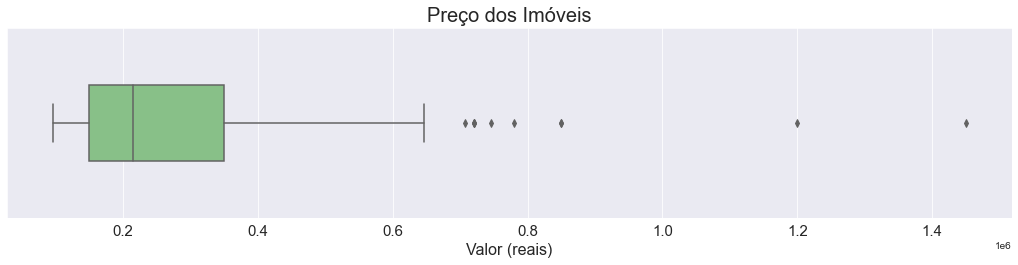

In [61]:
ax = sns.boxplot(x = 'Valor', data=dados_final, width= 0.4)
ax.figure.set_size_inches(18, 3.5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Valor (reais)', fontsize=16)
ax.tick_params(labelsize=15)
ax


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    É possivel notar uma assimetria a direita, porém é comum esse tipo de comportamento para esse tipo de variável, temos uma concentração muito grande de valores pequenos.</p>

<AxesSubplot:title={'center':'Preço dos Imóveis por Bairro'}, xlabel='Valor (reais)', ylabel='Bairros'>

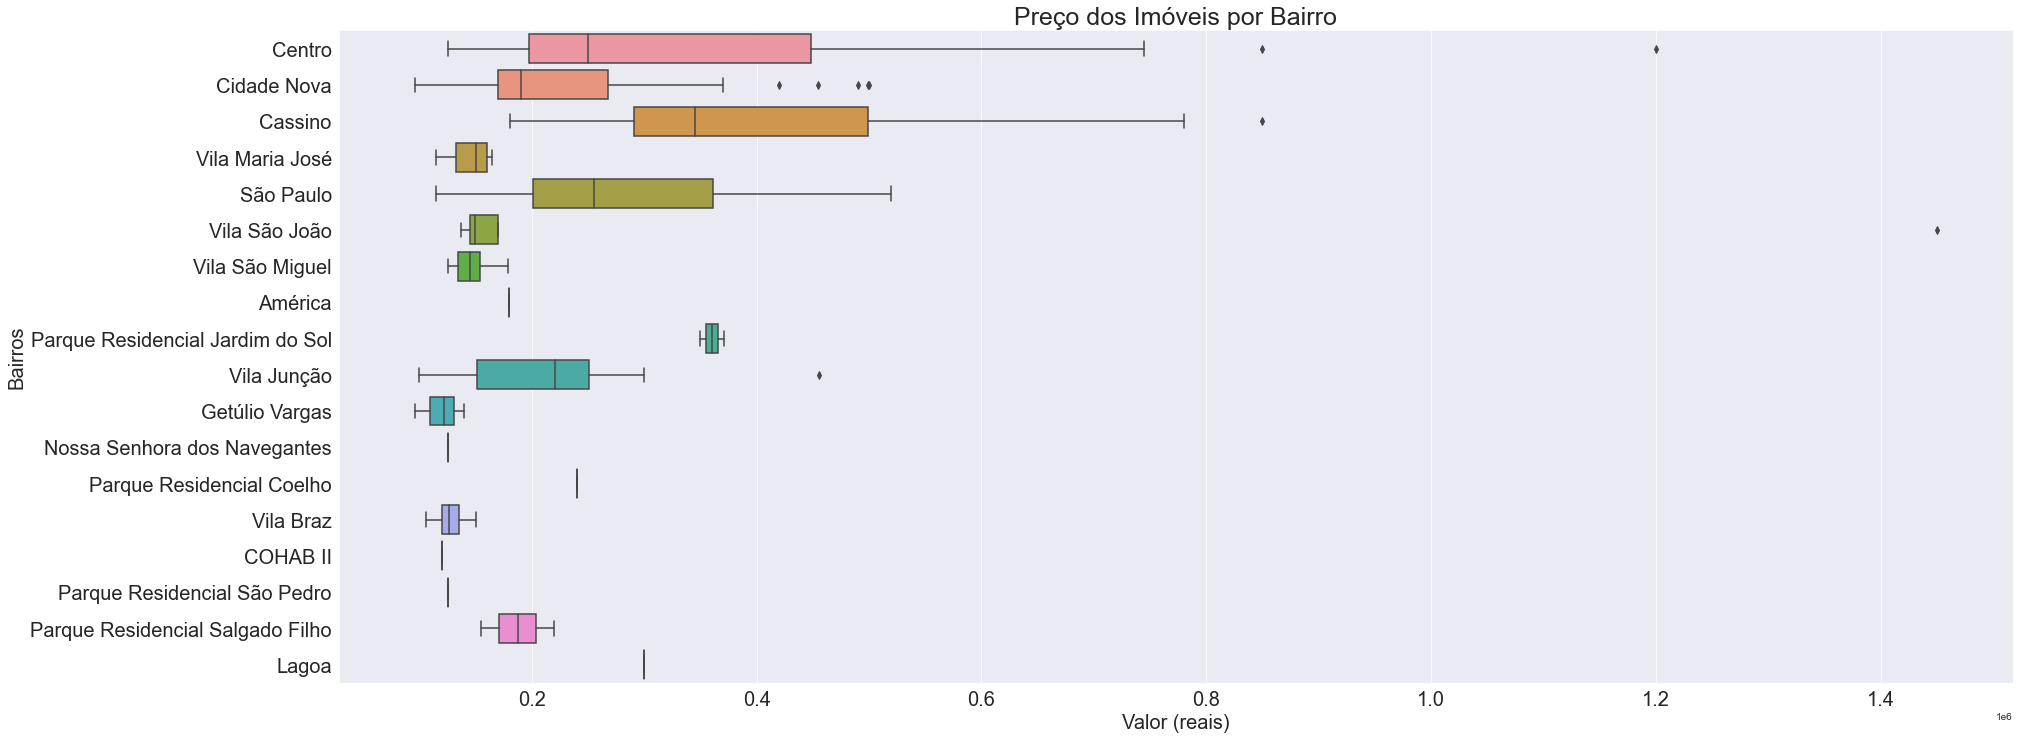

In [62]:
ax = sns.boxplot(x = 'Valor', y='Bairro', data=dados_final, width=0.8)
ax.figure.set_size_inches(30, 12)
ax.set_title('Preço dos Imóveis por Bairro', fontsize=25)
ax.set_xlabel('Valor (reais)', fontsize=20)
ax.set_ylabel('Bairros', fontsize=20)
ax.tick_params(labelsize=20)
ax

<AxesSubplot:title={'center':'Valor do Imóvel em Relação ao Número de Suites'}, xlabel='Valor em Reais', ylabel='Suites'>

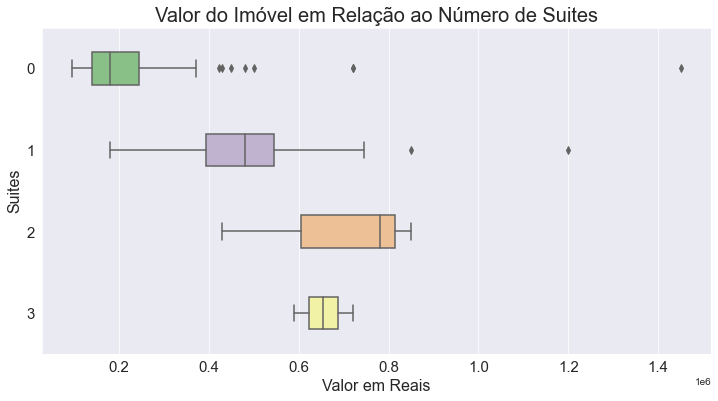

In [63]:
ax = sns.boxplot(y='Suites', x='Valor', data=dados_final, orient='h', width=0.4)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do Imóvel em Relação ao Número de Suites', fontsize=20)
ax.set_ylabel('Suites', fontsize=16)
ax.set_xlabel('Valor em Reais', fontsize=16)
ax.tick_params(labelsize = 15)
ax

<AxesSubplot:title={'center':'Valor do Imóvel em Relação ao Número de Banheiros'}, xlabel='Valor em Reais', ylabel='Banheiros'>

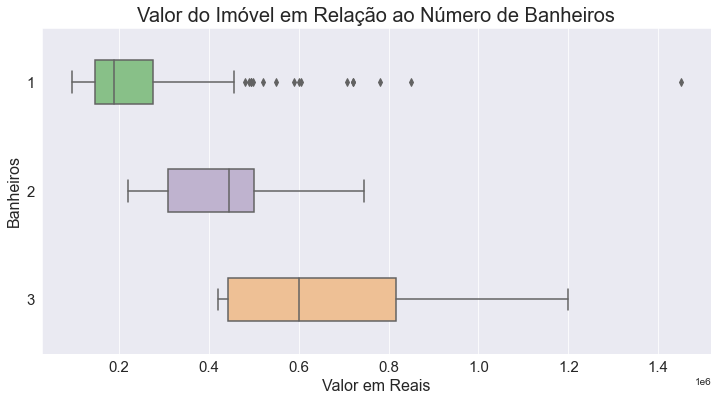

In [64]:
ax = sns.boxplot(y='Banheiros', x='Valor', data=dados_final, orient='h', width=0.4)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do Imóvel em Relação ao Número de Banheiros', fontsize=20)
ax.set_ylabel('Banheiros', fontsize=16)
ax.set_xlabel('Valor em Reais', fontsize=16)
ax.tick_params(labelsize = 15)
ax

<AxesSubplot:title={'center':'Valor do Imóvel em Relação ao Número de Vagas'}, xlabel='Valor em Reais', ylabel='Vagas'>

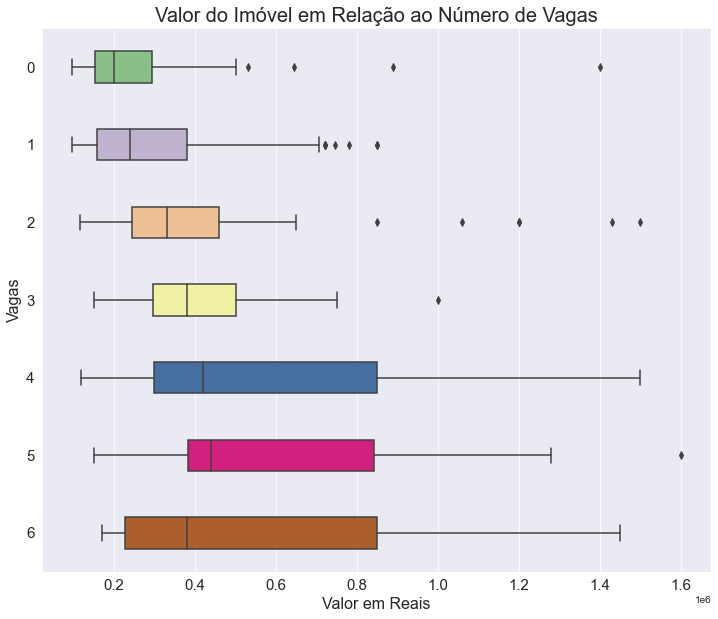

In [65]:
ax = sns.boxplot(y='Vagas', x='Valor', data=dados_respeitando_area_minima, orient='h', width=0.4)
ax.figure.set_size_inches(12, 10)
ax.set_title('Valor do Imóvel em Relação ao Número de Vagas', fontsize=20)
ax.set_ylabel('Vagas', fontsize=16)
ax.set_xlabel('Valor em Reais', fontsize=16)
ax.tick_params(labelsize = 15)
ax

<AxesSubplot:title={'center':'Valor do Imóvel em Relação ao Número de Dormitórios'}, xlabel='Valor em Reais', ylabel='Dormitorios'>

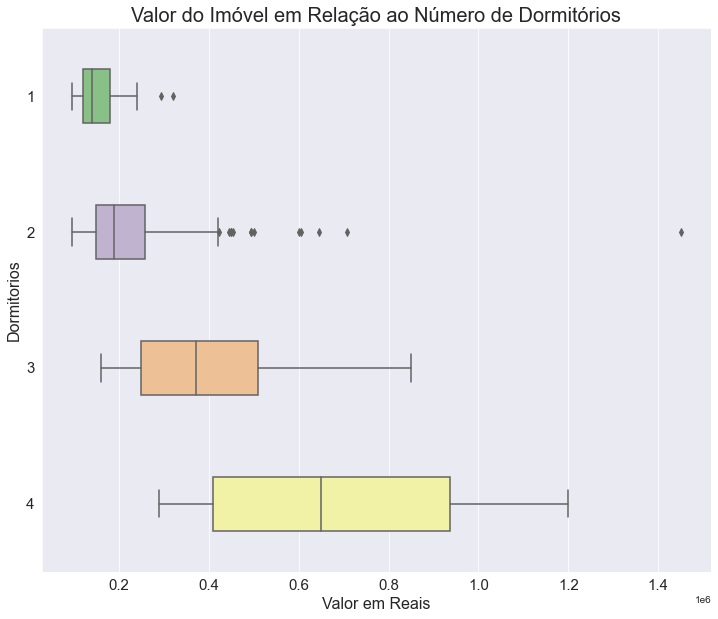

In [66]:
ax = sns.boxplot(y='Dormitorios', x='Valor', data=dados_final.query('Dormitorios <=6'), orient='h', width=0.4)
ax.figure.set_size_inches(12, 10)
ax.set_title('Valor do Imóvel em Relação ao Número de Dormitórios', fontsize=20)
ax.set_ylabel('Dormitorios', fontsize=16)
ax.set_xlabel('Valor em Reais', fontsize=16)
ax.tick_params(labelsize = 15)
ax

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

Abaixo esta plotado o gráfico com o valor do metro quadrado por bairro, foi plotado os bairros que possuiam a maior frequência de dados

In [67]:
dados_bairro = dados_bairro.reset_index() # vou pegar os 10 primeiros
dados_bairro.sort_values(ascending=False, by = 'Valor_m²_Bairro', inplace = True)

<AxesSubplot:title={'center':'Valor do metro quadrado por bairro em reais'}>

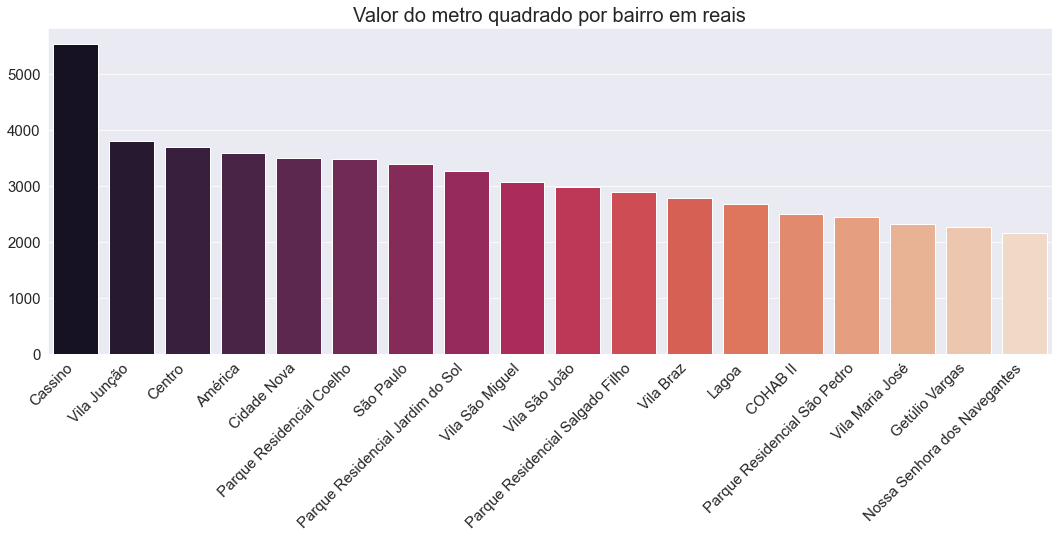

In [68]:
sns.set_palette('Accent')
ax = sns.barplot(x = 'Bairro', y = 'Valor_m²_Bairro', data = dados_bairro, palette="rocket")
ax.figure.set_size_inches(18, 6)

etiquetas = dados_bairro['Bairro']
ax.set_xticklabels(etiquetas, rotation=45, ha='right', fontsize=15)
ax.set_title('Valor do metro quadrado por bairro em reais', fontsize = 20)
ax.set_ylabel('', fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.tick_params(labelsize = 15)
ax

In [69]:
dados_bairro = dados_bairro[['Bairro', 'Valor_m²_Bairro']]

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Acrescentarei essa variavel aos dataset dos imoveis

In [70]:
dados_final = pd.merge(left=dados_final, right=dados_bairro, how = 'left')

#dados_geo = pd.merge(left= dados, right= enderecos_rg[['Bairro', 'Cep', 'Latitude', 'Longitude']], how = 'left')


In [71]:
dados_final.head()[['Bairro', 'Valor_m²_Bairro']]

,Bairro,Valor_m²_Bairro
0,Centro,3697.936408
1,Centro,3697.936408
2,Cidade Nova,3495.586381
3,Centro,3697.936408
4,Cassino,5547.196106


In [72]:
dados_final.columns

Index(['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area', 'Valor', 'Piscina', 'Tipo_Apartamento',
       'Tipo_Apartamento duplex', 'Tipo_Casa', 'Tipo_Cobertura', 'Tipo_Rancho',
       'Tipo_Sobrado', 'Bairro_América', 'Bairro_Bolaxa', 'Bairro_COHAB II',
       'Bairro_Cassino', 'Bairro_Castelo Branco', 'Bairro_Centro',
       'Bairro_Cidade Nova', 'Bairro_Frederico Ernesto Buchholz',
       'Bairro_Getúlio Vargas', 'Bairro_Lagoa', 'Bairro_Lar Gaúcho',
       'Bairro_Miguel de Castro Moreira',
       'Bairro_Nossa Senhora dos Navegantes', 'Bairro_Parque Marinha',
       'Bairro_Parque Residencial Coelho',
       'Bairro_Parque Residencial Jardim do Sol',
       'Bairro_Parque Residencial Salgado Filho',
       'Bairro_Parque Residencial São Pedro', 'Bairro_Quinta',
       'Bairro_Senandes', 'Bairro_São Paulo', 'Bairro_Vila Braz',
       'Bairro_Vila Hidráulica', 'Bairro_Vila Junção', 'Bairro_Vila Maria',
       'Bairro_Vila Maria José', 'B

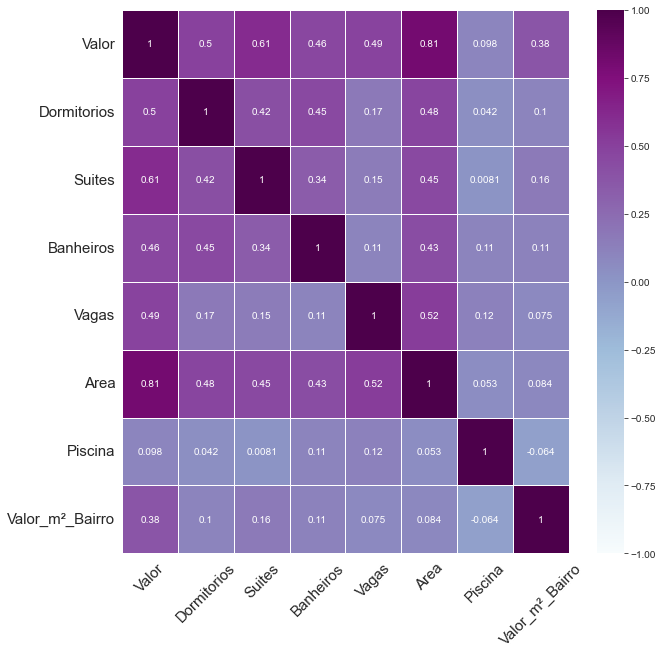

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_palette('Accent')
sns.set_style('darkgrid')


etiquetas = dados_final[['Valor','Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area','Piscina','Valor_m²_Bairro']]

mask = np.tril(etiquetas.corr())

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(etiquetas.corr(),
        vmin = -1, vmax=1, cmap = 'BuPu', linewidths=1, annot = True, xticklabels='auto')

ax.set_xticklabels(etiquetas, rotation=45, ha='center', fontsize=15)
ax.set_yticklabels(etiquetas,rotation=0, ha='right', fontsize=15)

plt.show()


## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Densidade'>

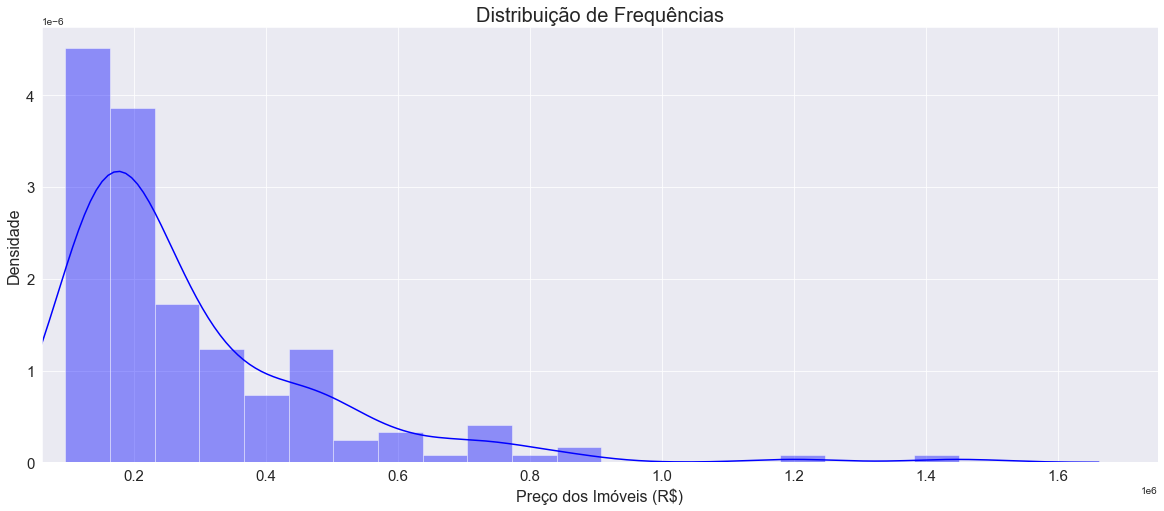

In [74]:
ax = sns.distplot(x = dados_final['Valor'], kde = True, bins = 20, norm_hist= True, color = 'b')
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
plt.xlim(60000)
ax.tick_params(labelsize = 15)

ax

<img width='800px' src='../img/Box-Plot II.png'>

In [75]:
filtro = pd.DataFrame(dados_final.groupby('Bairro').count()['Tipo'])
filtro.rename(columns = {'Tipo' : 'Frequência'}, inplace = True)
filtro

,Frequência
Bairro,
América,1
COHAB II,1
Cassino,26
Centro,55
Cidade Nova,35
Getúlio Vargas,3
Lagoa,1
Nossa Senhora dos Navegantes,1
Parque Residencial Coelho,2


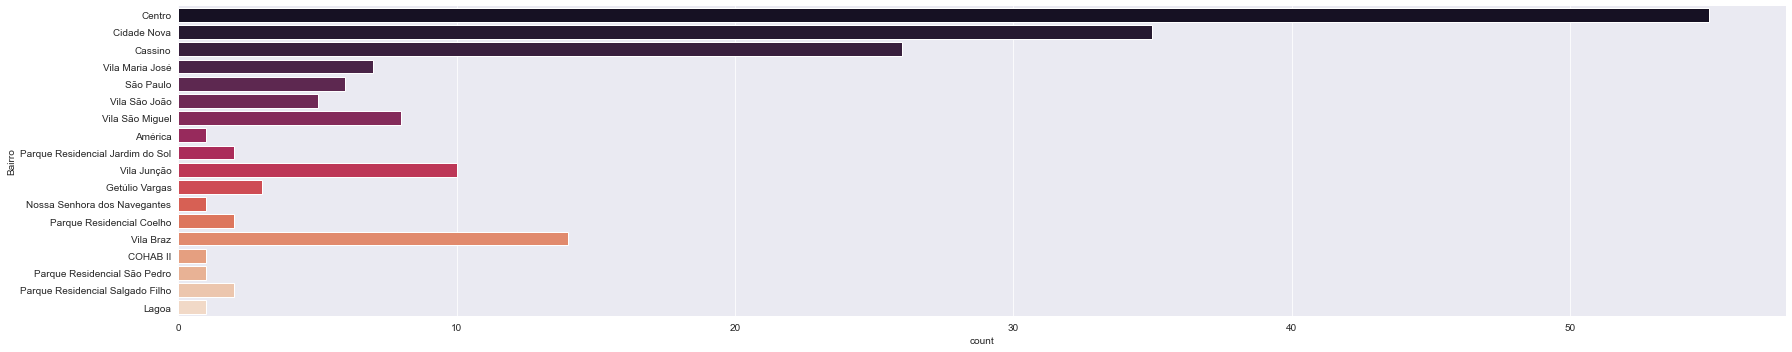

In [76]:
ax = sns.catplot(y = 'Bairro',
                 kind = 'count',
                 data = dados_final,
                 aspect = 5,
                 palette = 'rocket')

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset. Veremos se a variável dependente com as variáveis explicativas tem alguma relação linear.
<b>y_vars</b> será a variável depedente e <b>x_vars</b> será a lista com as variáveis independentes. utilizei apenas area pois os outros valores são numeros inteiros. (rever)</p>

In [77]:
dados_final.columns

Index(['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area', 'Valor', 'Piscina', 'Tipo_Apartamento',
       'Tipo_Apartamento duplex', 'Tipo_Casa', 'Tipo_Cobertura', 'Tipo_Rancho',
       'Tipo_Sobrado', 'Bairro_América', 'Bairro_Bolaxa', 'Bairro_COHAB II',
       'Bairro_Cassino', 'Bairro_Castelo Branco', 'Bairro_Centro',
       'Bairro_Cidade Nova', 'Bairro_Frederico Ernesto Buchholz',
       'Bairro_Getúlio Vargas', 'Bairro_Lagoa', 'Bairro_Lar Gaúcho',
       'Bairro_Miguel de Castro Moreira',
       'Bairro_Nossa Senhora dos Navegantes', 'Bairro_Parque Marinha',
       'Bairro_Parque Residencial Coelho',
       'Bairro_Parque Residencial Jardim do Sol',
       'Bairro_Parque Residencial Salgado Filho',
       'Bairro_Parque Residencial São Pedro', 'Bairro_Quinta',
       'Bairro_Senandes', 'Bairro_São Paulo', 'Bairro_Vila Braz',
       'Bairro_Vila Hidráulica', 'Bairro_Vila Junção', 'Bairro_Vila Maria',
       'Bairro_Vila Maria José', 'B

## Com a reta de regressão

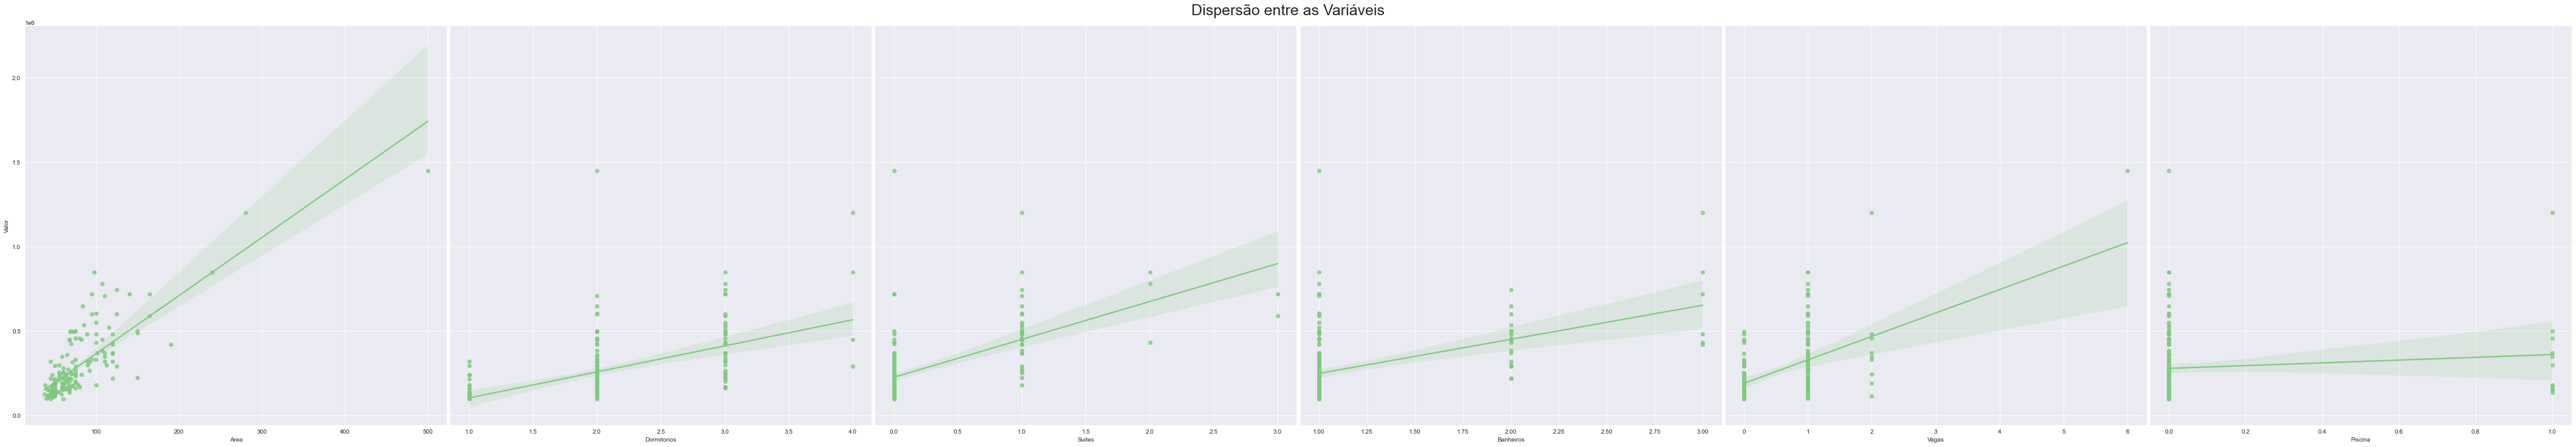

In [78]:
ax = sns.pairplot(dados_final, y_vars= 'Valor', x_vars=['Area','Dormitorios', 'Suites', 'Banheiros', 'Vagas', 'Piscina'], height= 10, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=25, y= 1.02)
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Na relação entre a variável dependente e explicativas, não conseguimos identificar muito bem uma relação linear entre elas, apenas em 36m² a 100m² mais ou menos. Será feita uma transformação da variável para tentar corrigir o problema e talvez conseguir traçar uma reta de regressão linear para essa base de dados. </p>

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Há duas razões para que transformações como esta sejam aplicadas aos dados: Uma estatística e uma proporcional.<br> <b>A primeira:</b> Supondo que a distribuição da variável em questão possui um viés, ou seja, uma das extremidades elevadas e uma cauda longa, medidas como correlação ou regressão podem ser bastante influenciadas pelo pico da distribuição, outliers, dentre outros. A aplicação da transformação pode reduzir o efeito do viés.<br> <b>A segunda:</b> Alguns conceitos são melhor compreendidos quando tratamos sobre a proporção dos objetos do que sobre a diferença entre eles. Suponha duas empresas, Lindo Olhar e Burguer King, de portes pequeno e muito grande, respectivamente. Lindo Olhar possui um faturamento diário de alguns milhares de reais por dia, enquanto a segunda possui um faturamento de milhões de reais por dia. Se o faturamento da primeira empresa passa de RS 3.000 para RS 9.000 (uma diferença de 6 mil reais, razão de 3), é uma grande diferença visto que seu faturamento triplicou. Já se o faturamento da segunda passa de RS 9.000.000 para RS 9.006.000 (uma diferença 6 mil reais, razão de pouco mais de 1), ninguém liga, visto que a diferença foi baixa. Neste caso a transformação logarítmica nos dados de faturamento durante um ano, por exemplo, poderia ser utilizada para comparar o crescimento das empresas de forma justa - podendo ajudar a deixar a relação entre os dados mais clara.</p>
<br> Referência : http://rstudio-pubs-static.s3.amazonaws.com/289147_99e32d5403f942339c3fe05414ac62fd.html

## Importando biblioteca numpy

In [79]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [80]:
np.log(0)

# Precisa ter cuidado pois temos casos de 0 vagas e 0 suites

-inf

In [81]:
# Processo de transformação para a base logarítimica
# variáveis : 'Area_construida','Dormitorios', 'Suites', 'Banheiros', 'Vagas'

In [82]:
dados_final.columns

Index(['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area', 'Valor', 'Piscina', 'Tipo_Apartamento',
       'Tipo_Apartamento duplex', 'Tipo_Casa', 'Tipo_Cobertura', 'Tipo_Rancho',
       'Tipo_Sobrado', 'Bairro_América', 'Bairro_Bolaxa', 'Bairro_COHAB II',
       'Bairro_Cassino', 'Bairro_Castelo Branco', 'Bairro_Centro',
       'Bairro_Cidade Nova', 'Bairro_Frederico Ernesto Buchholz',
       'Bairro_Getúlio Vargas', 'Bairro_Lagoa', 'Bairro_Lar Gaúcho',
       'Bairro_Miguel de Castro Moreira',
       'Bairro_Nossa Senhora dos Navegantes', 'Bairro_Parque Marinha',
       'Bairro_Parque Residencial Coelho',
       'Bairro_Parque Residencial Jardim do Sol',
       'Bairro_Parque Residencial Salgado Filho',
       'Bairro_Parque Residencial São Pedro', 'Bairro_Quinta',
       'Bairro_Senandes', 'Bairro_São Paulo', 'Bairro_Vila Braz',
       'Bairro_Vila Hidráulica', 'Bairro_Vila Junção', 'Bairro_Vila Maria',
       'Bairro_Vila Maria José', 'B

In [83]:
dados_final['log_Valor'] = np.log(dados_final['Valor'])
dados_final['log_Area'] = np.log(dados_final['Area'])
dados_final['log_Dormitorios'] = np.log(dados_final['Dormitorios'])
dados_final['log_Suites'] = np.log(dados_final['Suites'] + 1)
dados_final['log_Banheiros'] = np.log(dados_final['Banheiros'])
dados_final['log_Vagas'] = np.log(dados_final['Vagas'] + 1)
dados_final['log_Piscina'] = np.log(dados_final['Piscina'] + 1)



dados_final['log_Casa'] = np.log(dados_final['Tipo_Casa'] + 1)
dados_final['log_sobrado'] = np.log(dados_final['Tipo_Sobrado'] + 1)
dados_final['log_Apartamento'] = np.log(dados_final['Tipo_Apartamento'] + 1)
dados_final['log_Cobertura'] = np.log(dados_final['Tipo_Cobertura'] + 1)


dados_final['log_Valor_m²_Bairro'] = np.log(dados_final['Valor_m²_Bairro'])

In [84]:
dados_final.head()['log_Valor_m²_Bairro']

0    8.215530
1    8.215530
2    8.159256
3    8.215530
4    8.621048
Name: log_Valor_m²_Bairro, dtype: float64

## Distribuição de frequências da variável *dependente transformada* (y)  em todos os Bairros e todos os tipos

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Density'>

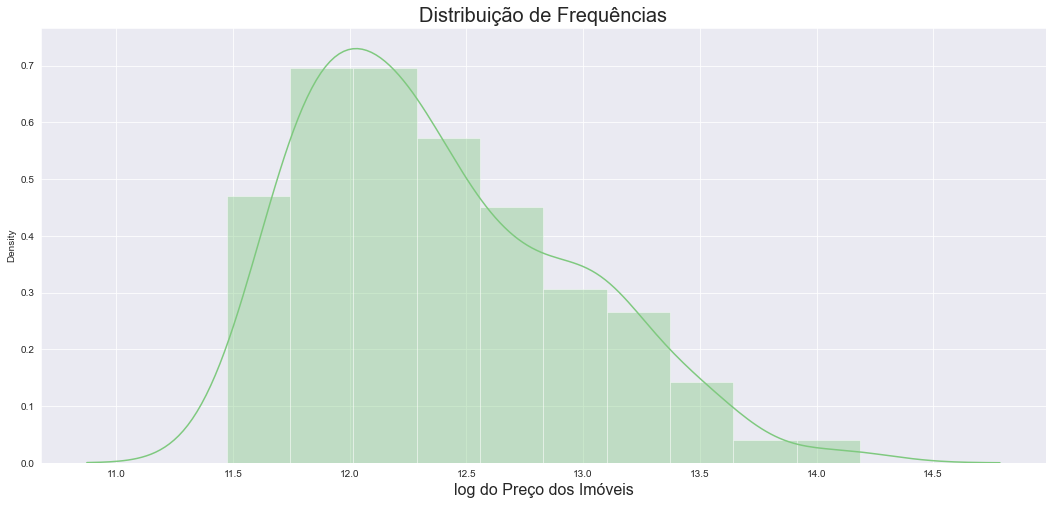

In [85]:
# vamos ver se foi possível se aproximar da distribuição normal 
# kde = estimativa de densidade de kernel
# log-normal : funcao de densidade de probabilidade

ax = sns.distplot(dados_final['log_Valor'])
ax.figure.set_size_inches(18, 8)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

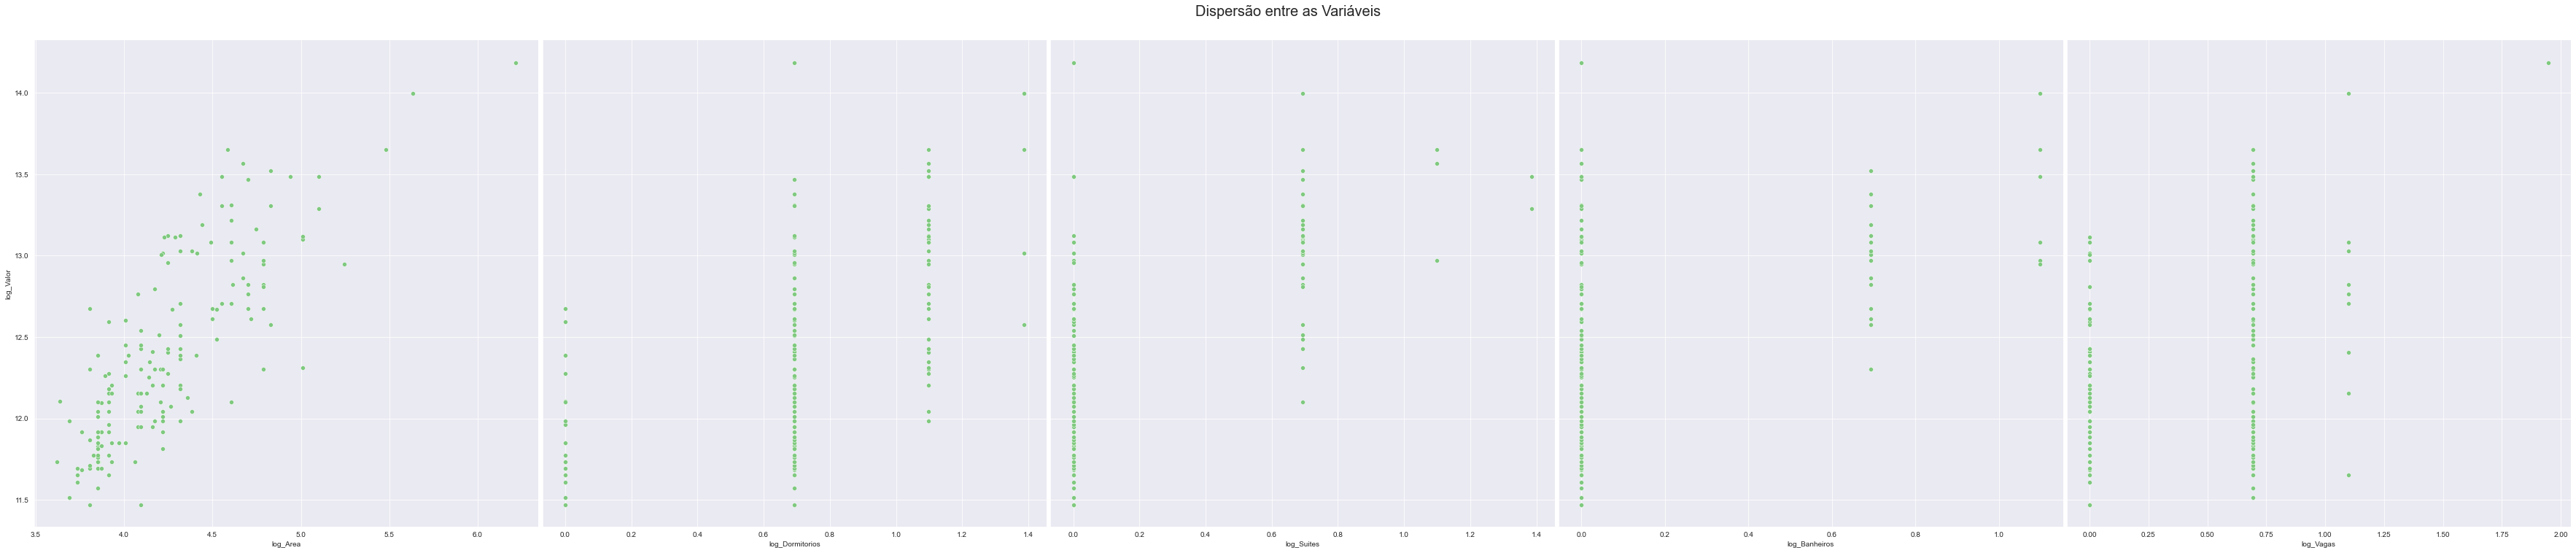

In [87]:
ax = sns.pairplot(dados_final, y_vars= 'log_Valor', x_vars=['log_Area','log_Dormitorios', 'log_Suites', 'log_Banheiros', 'log_Vagas'], height= 10)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y= 1.05)
ax

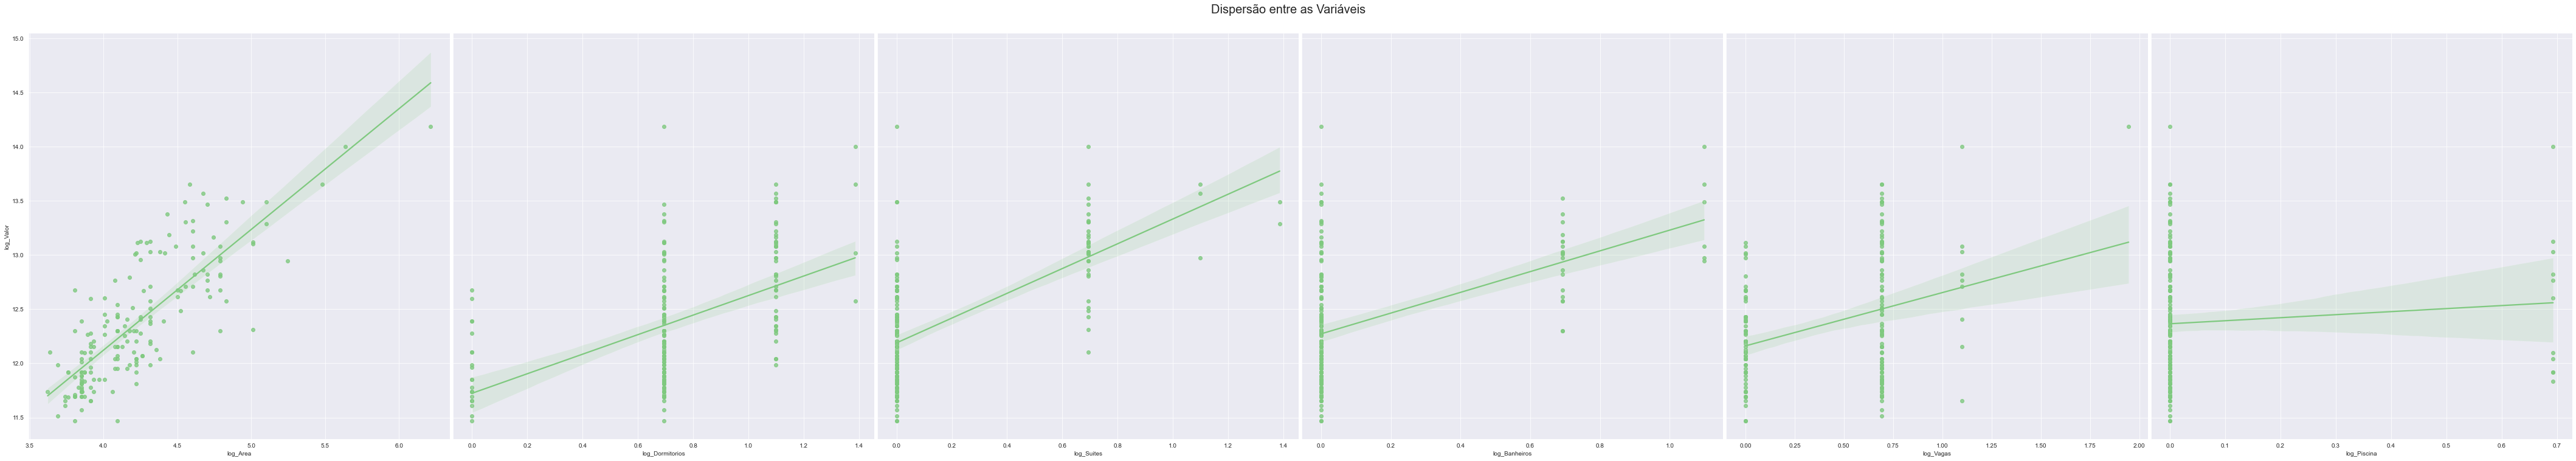

In [88]:
# Novamente, vamos analisar a dispersão entre as variáveis só que agora com as variáveis transformadas

ax = sns.pairplot(dados_final, y_vars= 'log_Valor', x_vars=['log_Area','log_Dormitorios', 'log_Suites', 'log_Banheiros', 'log_Vagas', 'log_Piscina'], height= 10, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y= 1.05)
ax


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Agora separaremos os dados em treino e teste, mas antes de fazer a estimação, devemos perceber quais variáveis não são boas de manter no modelo, pois ele pode ter ou não significancia para meu estudo.

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Dados de Treino:</b>
 Conforme podemos imaginar, dados de treino são os dados que serão apresentados ao algoritmo de machine learning para criação do modelo. Estes dados costumam representar cerca de 70% da totalidade dos dados.</p><br>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Dados de Teste:</b>
Serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho real seja verificado. Estes dados costumam representar cerca de 20% da totalidade dos dados.</p><br>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Referência : https://didatica.tech/dados-de-treino-e-teste/</p>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [89]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [90]:
y = dados_final['log_Valor']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [91]:
X = dados_final[['log_Area', 'log_Dormitorios', 'log_Suites',
       'log_Banheiros', 'log_Vagas', 'log_Piscina', 'log_Valor_m²_Bairro']]


In [92]:
X

,log_Area,log_Dormitorios,log_Suites,log_Banheiros,log_Vagas,log_Piscina,log_Valor_m²_Bairro
0,4.219508,0.693147,0.693147,0.000000,0.693147,0.000000,8.215530
1,4.521789,1.098612,0.693147,0.000000,0.693147,0.000000,8.215530
2,4.615121,1.098612,0.693147,0.000000,0.693147,0.000000,8.159256
3,5.634790,1.386294,0.693147,1.098612,1.098612,0.693147,8.215530
4,4.605170,0.693147,0.693147,0.000000,0.693147,0.000000,8.621048
...,...,...,...,...,...,...,...
175,5.101816,1.098612,1.386294,0.000000,0.693147,0.000000,8.215530
176,4.551242,1.098612,0.000000,0.000000,0.693147,0.000000,8.621048
177,4.828314,1.098612,0.693147,0.693147,0.693147,0.000000,8.215530
178,4.673576,1.098612,1.098612,0.000000,0.693147,0.000000,8.621048


## Criando os datasets de treino e de teste

In [93]:
# test_size indica o quanto % eu quero que ele pegue do conjunto de dados
# no caso, coloquei 0.20(20%) para teste e 0.8(80%) para treino
# random_state é só para setar o mesmo valor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=82)

In [94]:
X_train

,log_Area,log_Dormitorios,log_Suites,log_Banheiros,log_Vagas,log_Piscina,log_Valor_m²_Bairro
173,4.430817,0.693147,0.693147,0.693147,0.693147,0.0,8.621048
117,4.262680,0.693147,0.000000,0.000000,0.000000,0.0,8.215530
83,3.737670,0.693147,0.000000,0.000000,0.000000,0.0,7.931144
114,3.850148,0.693147,0.000000,0.000000,0.693147,0.0,8.033872
140,4.094345,0.693147,0.000000,0.000000,0.000000,0.0,8.215530
...,...,...,...,...,...,...,...
31,6.214608,0.693147,0.000000,0.000000,1.945910,0.0,8.000488
93,3.850148,0.693147,0.000000,0.000000,0.000000,0.0,8.033872
155,4.787492,1.098612,0.693147,0.000000,0.000000,0.0,8.215530
179,3.806662,0.000000,0.000000,0.000000,0.000000,0.0,8.159256


# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p><br>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Os <b>betas</b> são so coeficientes angulares parciais, os <b>X</b> são as variáveis explicativas, o  O <b>μi</b> é o termo de erro, que é o quanto da variação de y que não conseguiu ser explicada pela nossa equação.



<img width='800px' src="../img/./Log-linear.png">

## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [95]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nos estimamos os modelos com constante( o intercepto), nesta biblioteca eu tenho que informar isso, colocar essa constante dentro do dataframe de variáveis explicativas que vou usar para gerar as estimativas. </p>


In [96]:
X_train_com_constante = sm.add_constant(X_train)

In [97]:
X_train

,log_Area,log_Dormitorios,log_Suites,log_Banheiros,log_Vagas,log_Piscina,log_Valor_m²_Bairro
173,4.430817,0.693147,0.693147,0.693147,0.693147,0.0,8.621048
117,4.262680,0.693147,0.000000,0.000000,0.000000,0.0,8.215530
83,3.737670,0.693147,0.000000,0.000000,0.000000,0.0,7.931144
114,3.850148,0.693147,0.000000,0.000000,0.693147,0.0,8.033872
140,4.094345,0.693147,0.000000,0.000000,0.000000,0.0,8.215530
...,...,...,...,...,...,...,...
31,6.214608,0.693147,0.000000,0.000000,1.945910,0.0,8.000488
93,3.850148,0.693147,0.000000,0.000000,0.000000,0.0,8.033872
155,4.787492,1.098612,0.693147,0.000000,0.000000,0.0,8.215530
179,3.806662,0.000000,0.000000,0.000000,0.000000,0.0,8.159256


In [98]:
X_train_com_constante

,const,log_Area,log_Dormitorios,log_Suites,log_Banheiros,log_Vagas,log_Piscina,log_Valor_m²_Bairro
173,1.0,4.430817,0.693147,0.693147,0.693147,0.693147,0.0,8.621048
117,1.0,4.262680,0.693147,0.000000,0.000000,0.000000,0.0,8.215530
83,1.0,3.737670,0.693147,0.000000,0.000000,0.000000,0.0,7.931144
114,1.0,3.850148,0.693147,0.000000,0.000000,0.693147,0.0,8.033872
140,1.0,4.094345,0.693147,0.000000,0.000000,0.000000,0.0,8.215530
...,...,...,...,...,...,...,...,...
31,1.0,6.214608,0.693147,0.000000,0.000000,1.945910,0.0,8.000488
93,1.0,3.850148,0.693147,0.000000,0.000000,0.000000,0.0,8.033872
155,1.0,4.787492,1.098612,0.693147,0.000000,0.000000,0.0,8.215530
179,1.0,3.806662,0.000000,0.000000,0.000000,0.000000,0.0,8.159256


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Pesquisar, a algebra matricial por tras do modelo OLS( minimos quadrados ordinários), veremos que isso aqui é a forma como ele usa para estimar as matrizes e calcular o intercepto. Uma coluna com " 1 ". Por isso estamos fornecendo para o stats models.

In [99]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst= True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [100]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     85.26
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           3.88e-43
Time:                        21:11:47   Log-Likelihood:                 2.5166
No. Observations:                 126   AIC:                             10.97
Df Residuals:                     118   BIC:                             33.66
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6976      0.903      0.773      0.441      -1.090       2.485
log_Area                0.6762      0.074      9.127      0.000       0.529       0.823
log_Dormitorios         0.1335      0.089      1.497      0.137      -0.043       0.310
log_Suites              0.3784      0.084      4.524      0.000       0.213       0.544
log_Banheiros           0.0877      0.086      1.014      0.313      -0.084       0.259
log_Vagas               0.1078      0.061      1.778      0.078      -0.012       0.228
log_Piscina             0.2317      0.120      1.929      0.056      -0.006       0.470
log_Valor_m²_Bairro     1.0515      0.108      9.757      0.000       0.838       1.265
==============================================================================
Omnibus:                        6.677   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                7.087
Skew:                          -0.378   Prob(JB):                       0.0289
Kurtosis:                       3.883   Cond. No.                         388.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> O <b>teste F</b> é um teste que testa a significância dos parâmetros do modelo conjuntamente desses dados(coef) serem iguais a zero, ou seja, não fazem sentido, a regressão não faz sentido. Desta forma analisamos olhando para o teste f, o Prob (F-statistic). Para valores acima de 0.05, rejeitamos o modelo, ou seja, o modelo não é estatisticamente significante. <br> Para o nosso modelo, temos um valor menor que 0.05, ou seja, é significativo. <br>
Em <b>t</b> temos as estatíticas para cada variável(individual)  que eu coloquei no modelo, o  P>|t| é equivalenta ao Prob (F-statistic), então, 0.05 para baixo OK, acima de 0.05, esse parâmetro não é estatisticamente significativo. No meu caso, log_Dormitorios e log_Banheiros não apresentam um poder de explicação da variação da variável dependente. Vamos retirar essas variáveis do modelo.

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [101]:
# O y continua o mesmo, é nossa variável dependente

X = dados_final[[ 'log_Area','log_Suites','log_Valor_m²_Bairro']]


In [102]:
X.shape

(180, 3)

In [103]:
X

,log_Area,log_Suites,log_Valor_m²_Bairro
0,4.219508,0.693147,8.215530
1,4.521789,0.693147,8.215530
2,4.615121,0.693147,8.159256
3,5.634790,0.693147,8.215530
4,4.605170,0.693147,8.621048
...,...,...,...
175,5.101816,1.386294,8.215530
176,4.551242,0.000000,8.621048
177,4.828314,0.693147,8.215530
178,4.673576,1.098612,8.621048


## Criando os datasets de treino e de teste

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

## Estimando o modelo com o statsmodels

In [105]:
# adicionando a constante
X_train_com_constante = sm.add_constant(X_train)

In [106]:
X_train_com_constante

,const,log_Area,log_Suites,log_Valor_m²_Bairro
158,1.0,4.248495,0.000000,8.621048
100,1.0,3.850148,0.000000,8.033872
168,1.0,4.744932,0.693147,8.132227
35,1.0,4.094345,0.000000,8.132227
91,1.0,3.931826,0.000000,7.804243
...,...,...,...,...
118,1.0,4.204693,0.693147,8.215530
61,1.0,4.262680,0.000000,8.215530
143,1.0,4.317488,0.000000,8.215530
62,1.0,3.637586,0.000000,8.621048


In [107]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst= True).fit()

## Avaliando as estatísticas de teste do novo modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> <b> Teste de significância conjunta dos parâmetros :</b> Prob ( F-statistic) <= 0.05 (<b>OK</b>)<br>
<b> Teste de significância individual dos parâmetros :</b> P>|t| <= 0.05 (<b>OK</b>)

In [108]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     156.4
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           1.25e-41
Time:                        21:11:47   Log-Likelihood:                -2.8091
No. Observations:                 126   AIC:                             13.62
Df Residuals:                     122   BIC:                             24.96
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1231      0.821      2.585      0.011       0.497       3.749
log_Area                0.7478      0.074     10.065      0.000       0.601       0.895
log_Suites              0.4540      0.087      5.227      0.000       0.282       0.626
log_Valor_m²_Bairro     0.8571      0.098      8.740      0.000       0.663       1.051
==============================================================================
Omnibus:                        5.097   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.729
Skew:                          -0.358   Prob(JB):                       0.0940
Kurtosis:                       3.623   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> </b> Prob ( F-statistic) <= 0.05 (<b>OK</b>)<br>
</b> P>|t| <= 0.05 (<b>OK</b>)

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [110]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [111]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> O R-quadrado está sempre entre 0 e 100%:</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> - 0% indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.</p>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> - 100% indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>  Em geral, quanto maior o R-quadrado, melhor o modelo se ajusta aos seus dados. No entanto, existem condições importantes para esta diretriz.

In [112]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3))) # acuracia 

R² = 0.794


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> <b>Rascunho:</b> O que eu quero agora, é calcular um R² mas para o ajuste, para a previsão, agora vou prever os dados em cima dos dados de teste, e quero também calcular uma estatística que me diga se esse ajuste é bom ou não, vou utilizar um R² também mas primeiro preciso calcular o valor previsto.<br>
<p style='font-size: 25px; line-height: 2; margin: 10px 50px; text-align: justify;'> <b>Conceitos importantes:</b>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Underfitting</b> é uma tradução para o inglês de sub-ajustado. Ou seja, nosso modelo não conseguiu aprender suficiente sobre os dados. O underfitting leva à um erro elevado tanto nos dados de treino quando nos dados de teste.<br>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Overfitting</b> é o oposto. O termo vem da tradução de sobre-ajustado. É quando o modelo aprende demais sobre os dados. Neste caso, o modelo mostra-se adequado <b>apenas para os dados de treino</b>, como se o modelo tivesse apenas <b>decorado</b> os dados de treino e não fosse capaz de generalizar para outros dados nunca vistos antes. Quando isso acontece, os dados de treino apresentam resultados excelentes, enquanto que a performance do modelo cai drasticamente com os dados de teste.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify;'>Referências:https://abracd.org/overfitting-e-underfitting-em-machine-learning/#:~:text=O%20underfitting%20leva%20%C3%A0%20um,aprende%20demais%20sobre%20os%20dados<br>https://youtu.be/IHAb3NHDahU

In [113]:
y_previsto = modelo.predict(X_test)
y_previsto

array([11.79980113, 12.18718137, 12.74451816, 12.18718137, 11.90358893,
       11.88784436, 12.01841267, 12.27152778, 11.85923254, 12.17792589,
       12.27152778, 11.92293297, 12.06680415, 12.22615562, 11.92878745,
       11.79980113, 12.65951102, 12.74058196, 11.7156857 , 12.27442005,
       12.55547453, 12.61801094, 13.25532315, 13.62746849, 12.86857331,
       12.18718137, 11.88784436, 12.16535687, 13.3417082 , 12.27152778,
       13.0109981 , 11.79980113, 11.79980113, 11.73807519, 11.94902923,
       11.88784436, 13.24332118, 13.08975611, 12.17792589, 13.17787357,
       12.39303109, 11.96278599, 11.92878745, 12.42236187, 12.11590469,
       12.98891466, 11.69122287, 11.71356704, 12.65951102, 12.16535687,
       13.05922783, 13.01836035, 12.22615562, 12.10461761])

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [114]:
print('R² = %s' %metrics.r2_score(y_test,y_previsto).round(3))

R² = 0.851


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>R²(pred)</b> <br>
O R2 predito é calculado com uma fórmula que é equivalente a remover sistematicamente cada observação do conjunto de dados, estimando a equação de regressão e determinando quão bem o modelo prediz a observação removida. O valor do R2 predito varia entre 0% e 100%.


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Interpretação
Use R2 predito para determinar o quão bem seu modelo prediz as respostas para novas observações. Modelos que têm valores de R2 predito mais elevado têm melhor capacidade preditiva.

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um R2 predito que é substancialmente menor que o R2 pode indicar que o modelo está com excesso de ajuste. Um modelo com excesso de ajuste ocorre quando você adiciona termos para efeitos que não são importantes na população. O modelo se adapta aos dados de amostra e, por conseguinte, pode não ser útil para fazer predições em relação à população.

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O R2 previsto também pode ser mais útil do que o R2 ajustado para a comparação de modelos, porque ele é calculado com as observações que não estão incluídas no cálculo do modelo.

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Por exemplo, um analista de uma empresa de consultoria financeira desenvolve um modelo para prever as condições futuras do mercado. O modelo parece promissor porque tem um R2 de 87%. No entanto, o R2 predito é apenas para 52%, o que indica que o modelo pode estar com excesso de ajuste.
    
    
FONTE: https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/regression/how-to/best-subsets-regression/interpret-the-results/all-statistics/

## Validação Cruzada - Cross Validation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Dado um exemplo de validação cruzada com um cv = 10:

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Quando fazemos 10 vezes a validação cruzada, resultamos em 10 modelos diferentes. E qual desses 10 modelos queremos usar? Essa é uma pergunta delicada, e a resposta é que não queremos utilizar nenhum deles. Na validação cruzada, nós treinamos o algoritmo 10 vezes para termos uma estimativa de quão bem esse modelo funcionaria no mundo real. Agora, quando queremos o modelo propriamente dito para utilizarmos na vida real, devemos treiná-lo.

In [115]:
from sklearn.model_selection import cross_validate

# Aleatoriedade
from sklearn.model_selection import KFold

SEED = 25

# Passansdo o número de k-folds = 5 
cv = KFold(n_splits = 5, shuffle = True, random_state = SEED)

# Será passado X e y pois quem fará a estratificação do modelo é o próprio cross validate
resultados = cross_validate(modelo, X, y, cv = cv)

In [117]:
def imprime_resultados(results):
    # É retornado em um dicionário do Python, então selecionarei apenas o test_score
    # Ele separou por padrao 5, rodou o treino e o teste 5 vezes
    # .mean para obter a média
    media = resultados['test_score'].mean()
    
    # Desvio padrão
    desvio_padrao = resultados['test_score'].std()
    
    # Para obter o intervalo
    print("Accuracy média: %.2f" % (media * 100))
    print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [118]:
imprime_resultados(resultados)

Accuracy média: 79.63
Accuracy intervalo: [72.24, 87.03]


Para um intervalo de confiança de  95% da densidade, estará dentro da média, mais ou menos dois desvios padrões. Então, desvio padrão é o quanto estamos desviando dessa média. No caso do NumPy, é o mesmo array utilizado acima, mais .std()

##  Erro Percentual Absoluto Médio (MAPE)

Essa medida exprime uma porcentagem, obtida através da divisão da diferença entre predito (ŷ) e real pelo valor real (y).
<br>
<b>Vantagens e Desvantagens</b><br>
Por se tratar de uma porcentagem, essa métrica torna-se extremamente intuitiva, tanto para a interpretação do programador, quanto para a comunicação de resultados com pessoas sem conhecimento técnico. Por exemplo, ter um MAPE=12% significa que, em média, nosso modelo faz previsões que erram por 12% do valor real.

Devido a sua formulação, essa métrica não lida tão bem se tratando de problemas com um grande alcance de números, como uma regressão que prevê uma variável que vai e 10 a 20.000

In [119]:
import numpy as np

MAPE = np.mean(np.abs((y_test - y_previsto) / y_test)) * 100

print("Valor do MAPE dado em percentual: {:.2f}%".format(MAPE))

Valor do MAPE dado em percentual: 1.40%


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [120]:
entrada = X_test[0:1]
entrada

,log_Area,log_Suites,log_Valor_m²_Bairro
85,3.850148,0.0,7.931144


## Gerando previsão pontual

In [121]:
modelo.predict(entrada)[0]

# presisamos converter pois transformamos os dados, esse valor obtido é em log

11.799801130294739

## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [122]:
np.exp(modelo.predict(entrada)[0])

133225.85572420995

## Criando um simulador simples

In [155]:
# Simulador do preço de um imóvel 

Area = 80
Suites = 1
Valor_m2_Bairro = 4500


entrada = [[np.log(Area),
            np.log(Suites + 1),
            np.log(Valor_m2_Bairro),
           ]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 410137.26


## Salvando o modelo estimado

Para salvamos esse modelo, utilizaremos o Pickle, uma biblioteca do Python que implementa protocolos binários para serializar e deserializar a estrutura de um objeto Python.<br>
exemplo: Pega o modelo da memória, transforma em um binário e salva na pasta e utilizamos como quisermos depois.

In [124]:
import pickle

In [125]:
output = open('modelo_simulador_imoveis_rio_grande', 'wb')  #output: saida wb:whitebinare
pickle.dump(modelo, output)
output.close()

# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>


## Por quê?

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Podemos perceber qual o efeito de variáveis individualmente, qual é mais significativa para o negócio, qual impacta mais o negócio negativamente ou positivamente. Então, essa ferramenta é boa para responder essas questões.<br>
    
## Obtendo o intercepto do modelo
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>


In [126]:
modelo.intercept_ # este e o log do parametro real

2.123084768669502

In [127]:
np.exp(modelo.intercept_) # este é o valor médio retirado todo o efeito das outras variáveis explicativas excluidas do modelo( caso elas sejam 0)

8.356876799090882

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$, $\beta_3$ e $\beta_4$ medem as elasticidades de Y em relação a $X_2$, $X_3$ e $X_4$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$, $X_3$ e $X_4$.</p>

In [128]:
modelo.coef_

array([0.74783907, 0.45403007, 0.85705485])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [129]:
X.columns

Index(['log_Area', 'log_Suites', 'log_Valor_m²_Bairro'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [130]:
index = ['Intercepto','Area', 'Suites','Valor_m²_Bairro']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [131]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])
#esta tudo em log

,Parâmetros
Intercepto,2.123085
Area,0.747839
Suites,0.454030
Valor_m²_Bairro,0.857055


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas o efeito médio no Preço dos Imóveis seria de <b>R$ 8.356</b> (exp[2.123]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Area</b> → Mantendo-se o valor de das outras variáveis constantes, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>0.747%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Suites</b> →Mantendo-se o valor de das outras variáveis constantes, um acréscimo de 1% nas Suites gera, em média, um acréscimo de <b>0.454%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Valor_m²_Bairro</b> → Mantendo-se o valor de das outras variáveis constantes, um acréscimo de 1% na variável Valor_m²_Bairro, em média, um acréscimo de <b>0.857%</b> no Preço do Imóvel.
</p>



# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [132]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

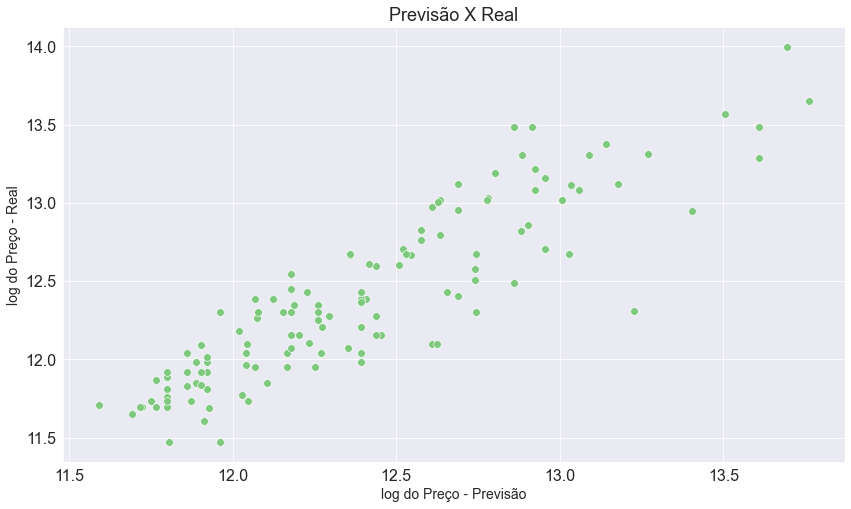

In [133]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train, s = 60)
ax.figure.set_size_inches(14, 8)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax.tick_params(labelsize=16)
ax

## Obtendo os resíduos

In [134]:
# A parte da previsão que não conseguiu ser explicada pelo nosso modelo, o mi

residuo = y_train - y_previsto_train # valor real menos valor previsto

In [135]:
residuo 

158    0.268502
100   -0.038518
168    0.205580
35     0.146623
91    -0.016053
         ...   
118   -0.522676
61    -0.279502
143    0.036185
62    -0.125872
132    0.040934
Name: log_Valor, Length: 126, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Método informal de verificação da hipótese de variância constante dos resíduos(homocedastidade). Isso é uma hipótese que é importante para um modelo de regressão linear, os resíduos tem que ter uma variação constante, por isso o nome <b>homocedasticidade</b>, pois as estatísticas que analisamos, as mais formais, precisam que isso seja atendido para que elas sejam válidas.

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='log do Preço - Previsão', ylabel='Resíduos'>

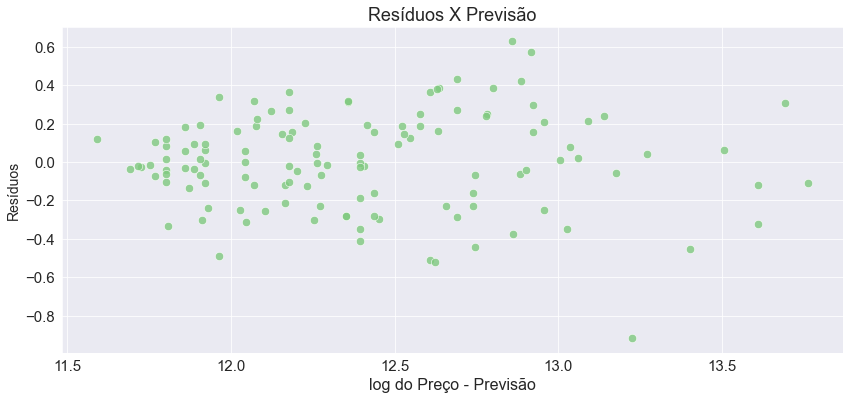

In [136]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo, s = 70, alpha = 0.8)
ax.figure.set_size_inches(14,6)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=16)
ax.tick_params(labelsize=15)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src="../img/./var_u.jpg">


Fonte: Econometria Básica - 5 edicão - Guajarti e Porter

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='log do Preço - Previsão', ylabel='Resíduos²'>

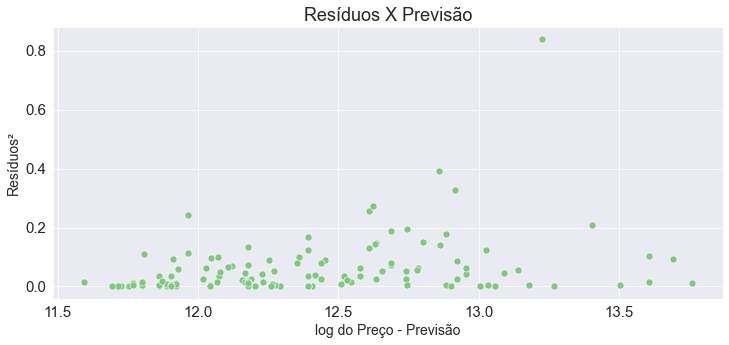

In [137]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s = 50)
ax.figure.set_size_inches(12,5)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax.tick_params(labelsize=15)
ax

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Nessa observação, notamos que a variância dos resíduos não é constante, a mostra é pequena e talvez seja esse o problema. Com o tamanho da amostra aumentando, talvez consiga dissolver esse problema.

## Plotando a distribuição de frequências dos resíduos

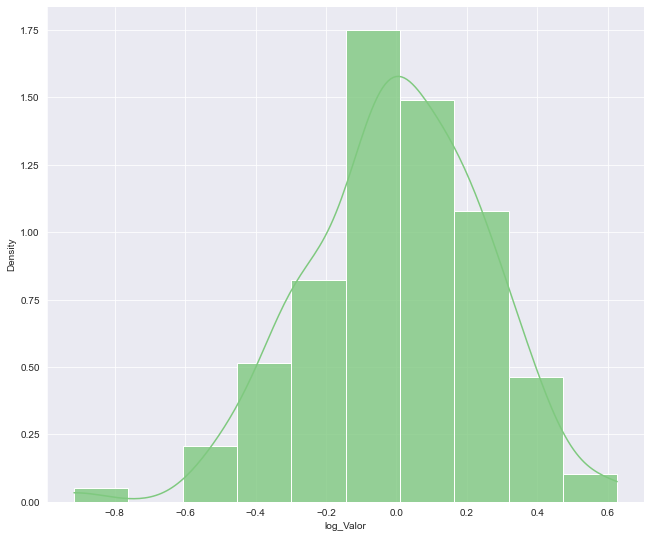

In [138]:
ax = sns.displot(data = residuo, kde = True, stat='density', alpha=0.8, bins = 10)
ax.figure.set_size_inches(10, 8)
ax

In [139]:
from scipy import stats
alpha = 0.05
k2, p = stats.normaltest(residuo)

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula PODE ser rejeitada")
else:
    print("A hipótese nula NÃO pode ser rejeitada")

A hipótese nula NÃO pode ser rejeitada


# <font color='red' style='font-size: 30px;'>6. Preâmbulo</font>
<hr style='border: 2px solid red;'>

In [140]:
# Bibliotecas específicas para o aprendizado de máquina
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor 


In [141]:
# Normalização 
escala = StandardScaler()
escala.fit(X)

X_norm = escala.transform(X)

In [142]:
# Dividindo em conjunto de treinamento e teste

X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

In [143]:
# rna = rede neural artifical

# número de camadas ocultas, a primeira camada oculta terá 10 neuronios e a segunda 5 neuronios
rna = MLPRegressor(hidden_layer_sizes=(2, 10, 25),
                  max_iter=2000,
                  tol=0.00000001,
                  learning_rate_init=0.1,
                  solver = 'sgd',
                  activation = 'logistic',
                  learning_rate='constant',
                  verbose=2)

# 2000 épocas
# se meu algoritmo não melhorar em uma época 0.0000001, o algoritmo convergiu 
# taxa de aprendizado de 0.1
# verbose = mostrar o que ta acontecendo nas épocas


In [144]:
rna.fit(X_norm_train, y_train)

Iteration 1, loss = 66.26891218
Iteration 2, loss = 15.63433147
Iteration 3, loss = 1.81504720
Iteration 4, loss = 0.43077596
Iteration 5, loss = 0.13953970
Iteration 6, loss = 0.13930460
Iteration 7, loss = 0.13282261
Iteration 8, loss = 0.12865910
Iteration 9, loss = 0.12508189
Iteration 10, loss = 0.12083742
Iteration 11, loss = 0.11559888
Iteration 12, loss = 0.10930590
Iteration 13, loss = 0.10202921
Iteration 14, loss = 0.09393920
Iteration 15, loss = 0.08529133
Iteration 16, loss = 0.07640819
Iteration 17, loss = 0.06765324
Iteration 18, loss = 0.05939665
Iteration 19, loss = 0.05197728
Iteration 20, loss = 0.04566613
Iteration 21, loss = 0.04063685
Iteration 22, loss = 0.03694818
Iteration 23, loss = 0.03454150
Iteration 24, loss = 0.03325445
Iteration 25, loss = 0.03284840
Iteration 26, loss = 0.03304502
Iteration 27, loss = 0.03356496
Iteration 28, loss = 0.03416219
Iteration 29, loss = 0.03464823
Iteration 30, loss = 0.03490389
Iteration 31, loss = 0.03487851
Iteration 32, l

MLPRegressor(activation='logistic', hidden_layer_sizes=(2, 10, 25),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-08,
             verbose=2)

In [145]:
reglinear = SGDRegressor(max_iter= 2000,
                        tol=0.0000000001,
                        eta0=0.01,
                        learning_rate='constant',
                        verbose=2)

In [146]:
reglinear.fit(X_norm_train, y_train)

-- Epoch 1
Norm: 0.25, NNZs: 3, Bias: 8.942099, T: 126, Avg. loss: 28.695814
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.28, NNZs: 3, Bias: 11.417904, T: 252, Avg. loss: 2.268750
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.36, NNZs: 3, Bias: 12.112233, T: 378, Avg. loss: 0.212016
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.38, NNZs: 3, Bias: 12.312601, T: 504, Avg. loss: 0.044798
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.37, NNZs: 3, Bias: 12.359725, T: 630, Avg. loss: 0.031009
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.39, NNZs: 3, Bias: 12.377958, T: 756, Avg. loss: 0.029626
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.38, NNZs: 3, Bias: 12.375260, T: 882, Avg. loss: 0.029277
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.38, NNZs: 3, Bias: 12.379371, T: 1008, Avg. loss: 0.028985
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.39, NNZs: 3, Bias: 12.387954, T: 1134, Avg. loss: 0.029094
Total training time: 0.00

SGDRegressor(learning_rate='constant', max_iter=2000, tol=1e-10, verbose=2)

## Pós-processamento

In [147]:
# Previsão no conjunto de teste
y_rna_previsao = rna.predict(X_norm_test)
y_rl_previsao = reglinear.predict(X_norm_test)

In [148]:
# Calculo do R2

r2_rna = r2_score(y_test, y_rna_previsao)
r2_rl = r2_score(y_test, y_rl_previsao)

print('R2 RNA:', r2_rna)
print('R2 RL:', r2_rl)

R2 RNA: 0.8298260397496803
R2 RL: 0.8180636590582885


In [149]:
residuo = y_test - y_rna_previsao # valor real menos valor previsto

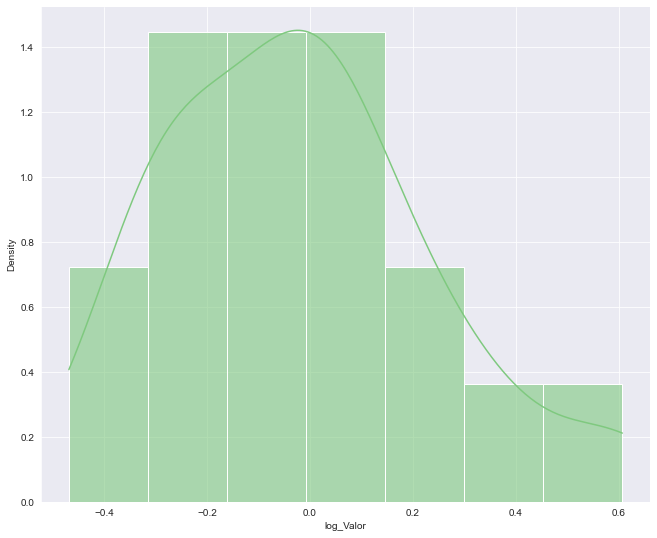

In [152]:
ax = sns.displot(data = residuo, kde = True, stat='density', alpha=0.6)
ax.figure.set_size_inches(10, 8)
ax

In [151]:
from scipy import stats
alpha = 0.05
k2, p = stats.normaltest(residuo)

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula PODE ser rejeitada")
else:
    print("A hipótese nula NÃO pode ser rejeitada")

A hipótese nula NÃO pode ser rejeitada
